# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import random

random.seed(656565)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

## Deskripsi Dataset

Dataset [Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii) berisi semua transaksi yang terjadi untuk perusahaan ritel online yang berbasis di Inggris dan terdaftar, tanpa toko fisik, antara tanggal 01/12/2009 dan 09/12/2011. Perusahaan ini utamanya menjual barang-barang hadiah serba guna yang unik. Banyak pelanggan perusahaan ini adalah pedagang grosir.

Dataset terdiri dari 525461 baris 8 fitur yaitu:

* Invoice: Nomor Faktur. Nominal. Nomor integral 6 digit yang diberikan secara unik untuk setiap transaksi. Jika kode ini dimulai dengan huruf 'C', itu menandakan pembatalan.
* StockCode: Kode Produk (barang). Nominal. Nomor integral 5 digit yang diberikan secara unik untuk setiap produk yang berbeda.
* Description: Nama Produk (barang). Nominal.
* Quantity: Jumlah dari setiap produk (barang) per transaksi. Numerik.
* InvoiceDate: Tanggal dan waktu Faktur. Numerik. Hari dan waktu ketika transaksi dihasilkan.
* UnitPrice: Harga per unit. Numerik. Harga produk per unit dalam mata uang pound sterling (£).
* Customer ID: Nomor Pelanggan. Nominal. Nomor integral 5 digit yang diberikan secara unik untuk setiap pelanggan.
* Country: Nama Negara. Nominal. Nama negara tempat pelanggan tinggal.


## Import Data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Tubes Decision Making/online_retail_II.xlsx')

In [ ]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


# Statistics Summary

In [ ]:
df.describe()

Quantity          Price    Customer ID
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000

Dalam data tersebut, terlihat adanya outlier dan potensi masalah kualitas data, terutama dalam kolom Kuantitas dan Harga dengan nilai negatif dan sangat besar. Selain itu, rentang yang luas dan deviasi standar tinggi pada kedua kolom Kuantitas dan Harga menunjukkan variasi yang signifikan dalam atribut-atribut ini.

In [ ]:
df.describe(include='object')

Invoice StockCode                         Description         Country
count    525461    525461                              522533          525461
unique    28816      4632                                4681              40
top      537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq        675      3516                                3549          485852

Dataset ini berisi beragam produk, tanpa satu produk atau nomor faktur yang dominan, dan sebagian besar pembelian berasal dari United Kingdom. Terdapat ketidakkonsistenan pada StockCode dan Description.

# Cleaning

## Missing Value

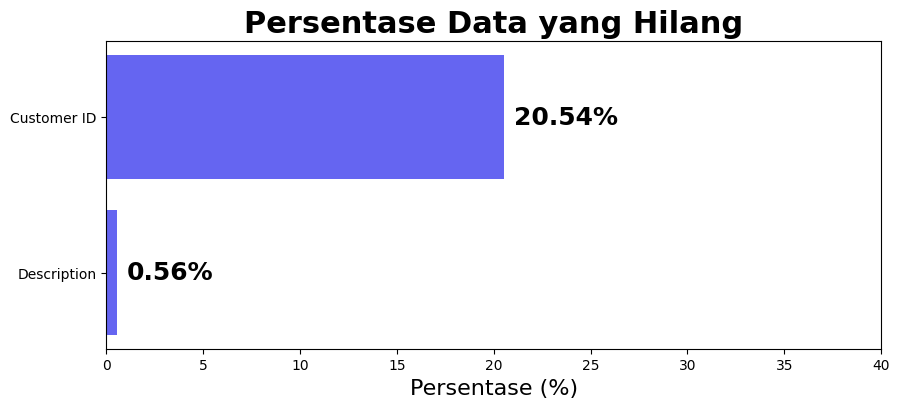

In [ ]:
# Menghitung persentase nilai yang hilang untuk setiap kolom
data_hilang = df.isnull().sum()
persentase_hilang = (data_hilang[data_hilang > 0] / df.shape[0]) * 100

# Urutkan berdasarkan missing value terbanyak
persentase_hilang.sort_values(ascending=True, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.barh(persentase_hilang.index, persentase_hilang, color='#6565F1')

for i, (nilai, nama) in enumerate(zip(persentase_hilang, persentase_hilang.index)):
    ax.text(nilai+0.5, i, f"{nilai:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

ax.set_xlim([0, 40])
plt.title("Persentase Data yang Hilang", fontweight='bold', fontsize=22)
plt.xlabel('Persentase (%)', fontsize=16)
plt.show()

* Missing hilang pada CustomerID dan Description akan dihapus
* Missing data pada CustomerID dihapus karena CustomerID merupakan fitur yang penting dan tidak bisa digantikan
* Missing data pada description dihapus karena tidak terlalu banyak missing value dan tidak bisa dilakukan penyesuaian dengan StockCode karena terdapat ketidakkonsistenan berdasarkan deskripsi statistik sebelumnya

In [ ]:
# Melihat 10 data teratas pada data dengan missing value
df[df['Customer ID'].isnull() | df['Description'].isnull()].head()

Invoice StockCode                Description  Quantity  \
263  489464     21733               85123a mixed       -96   
283  489463     71477                      short      -240   
284  489467    85123A                21733 mixed      -192   
470  489521     21646                        NaN       -50   
577  489525    85226C  BLUE PULL BACK RACING CAR         1   

            InvoiceDate  Price  Customer ID         Country  
263 2009-12-01 10:52:00   0.00          NaN  United Kingdom  
283 2009-12-01 10:52:00   0.00          NaN  United Kingdom  
284 2009-12-01 10:53:00   0.00          NaN  United Kingdom  
470 2009-12-01 11:44:00   0.00          NaN  United Kingdom  
577 2009-12-01 11:49:00   0.55          NaN  United Kingdom

In [ ]:
# Hapus Missing Data
df = df.dropna(subset=['Customer ID', 'Description'])

In [ ]:
# Cek kembali jumlah data yang hilang
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
# Dimensi data sekarang
df.shape

(417534, 8)

## Data Duplikat

In [ ]:
# Filter Baris Duplikat
baris_duplikat = df[df.duplicated(keep=False)]

# Mengurutkan data
baris_duplikat_sorted = baris_duplikat.sort_values(by=['Invoice', 'StockCode', 'Description', 'Customer ID', 'Quantity'])

# Menampilkan 10 data teratas
baris_duplikat_sorted.head(10)

Invoice StockCode                       Description  Quantity  \
379  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
391  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
365  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
386  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
363  489517     21912          VINTAGE SNAKES & LADDERS         1   
371  489517     21912          VINTAGE SNAKES & LADDERS         1   
394  489517     21912          VINTAGE SNAKES & LADDERS         1   
362  489517     21913    VINTAGE SEASIDE JIGSAW PUZZLES         1   
385  489517     21913    VINTAGE SEASIDE JIGSAW PUZZLES         1   
368  489517     22130  PARTY CONE CHRISTMAS DECORATION          6   

            InvoiceDate  Price  Customer ID         Country  
379 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
391 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
365 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
386 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
363 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
371 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
394 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
362 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
385 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
368 2009-12-01 11:34:00   0.85      16329.0  United Kingdom

In [ ]:
# Jumlah Baris Duplikat
df.duplicated().sum()

6771

In [ ]:
# Hapus Data Duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Dimensi data sekarang
df.shape

(410763, 8)

# Transaksi yang dibatalkan

Pada fitur Invoice, jika kode ini dimulai dengan huruf 'C' berarti transaksi tersebut dibatalkan.

In [ ]:
# Buat kolom baru berisi status transaksi
df['Transaction_Status'] = np.where(df['Invoice'].astype(str).str.startswith('C'), 'Dibatalkan', 'Selesai')

# Lihat statistik deskriptif dari transaksi yang dibatalkan
transaksi_dibatalkan = df[df['Transaction_Status'] == 'Dibatalkan']
transaksi_dibatalkan.describe().drop('Customer ID', axis=1)

Quantity         Price
count  9816.000000   9816.000000
mean    -21.582722     28.529997
std     212.324392    405.514214
min   -9360.000000      0.010000
25%      -6.000000      1.565000
50%      -2.000000      2.950000
75%      -1.000000      6.750000
max      -1.000000  25111.090000

Harga barang yang dibatalkan cukup bervariasi, tidak ada kecondongan terhadap suatu barang.

In [ ]:
# Hitung Persentase pembatalan
persentase_dibatalkan = (transaksi_dibatalkan.shape[0] / df.shape[0]) * 100
print(f"Persentase transaksi yang dibatalkan dalam dataset adalah: {persentase_dibatalkan:.2f}%")

Persentase transaksi yang dibatalkan dalam dataset adalah: 2.39%


## Data Anomali

### StockCode

In [ ]:
# Jumlah kode barang yang unik
df['StockCode'].nunique()

4031

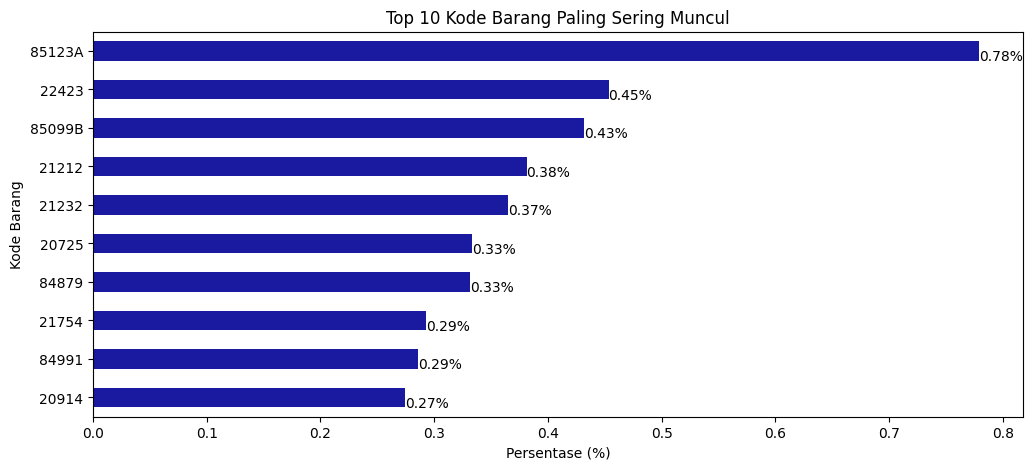

In [ ]:
# filter 10 kode barang yang paling sering muncul
top_10_StockCode = df['StockCode'].value_counts(normalize=True).head(10) * 100

# 10 kode barang paling sering muncul
plt.figure(figsize=(12, 5))
top_10_StockCode.plot(kind='barh', color='#1A1AA0')

# Menambahkan persentase frekuensi pada batang diagram
for indeks, nilai in enumerate(top_10_StockCode):
    plt.text(nilai, indeks+0.25, f'{nilai:.2f}%', fontsize=10)

plt.title('Top 10 Kode Barang Paling Sering Muncul')
plt.xlabel('Persentase (%)')
plt.ylabel('Kode Barang')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Mencari jumlah karakter numerik dalam setiap kode barang unik
StockCode_unik = df['StockCode'].unique()
jumlah_karakter_numerik_StockCode = pd.Series(StockCode_unik).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Mencetak nilai frekuensi karakter numerik untuk kode barang unik
print("Nilai frekuensi karakter numerik dalam kode barang unik:")
print("-"*70)
print(jumlah_karakter_numerik_StockCode)

Nilai frekuensi karakter numerik dalam kode barang unik:
----------------------------------------------------------------------
5    4020
0       6
1       2
3       2
4       1
dtype: int64


Terdapat anomali pada StockCode dengan total 11 kode menyimpang dari aturan penulisan StockCode yang seharusnya terdiri dari 5 atau 6 karakter yang terdiri dari karakter alfabet dan/atau numerik.

In [ ]:
# Mencari dan mencetak kode barang dengan jumlah karakter kurang dari 5
StockCode_anomali = [kode for kode in StockCode_unik if sum(c.isdigit() for c in str(kode)) < 5]

# Print kode yang anomali
print("Kode barang anomali:")
print("-"*22)
for kode in StockCode_anomali:
    print(kode)

Kode barang anomali:
----------------------
POST
D
M
C2
BANK CHARGES
TEST001
TEST002
PADS
ADJUST
ADJUST2
SP1002


In [ ]:
# Menghitung persentase
persentase_anomali = (df['StockCode'].isin(StockCode_anomali).sum() / len(df)) * 100
print(f"Persentase kode barang yang anomali dalam dataset adalah: {persentase_anomali:.2f}%")

Persentase kode barang yang anomali dalam dataset adalah: 0.44%


In [ ]:
# Hapus baris dari kode yang anomali
df = df[~df['StockCode'].isin(StockCode_anomali)]

# Cek dimensi data sekarang
df.shape

(408952, 9)

### Kolom Description

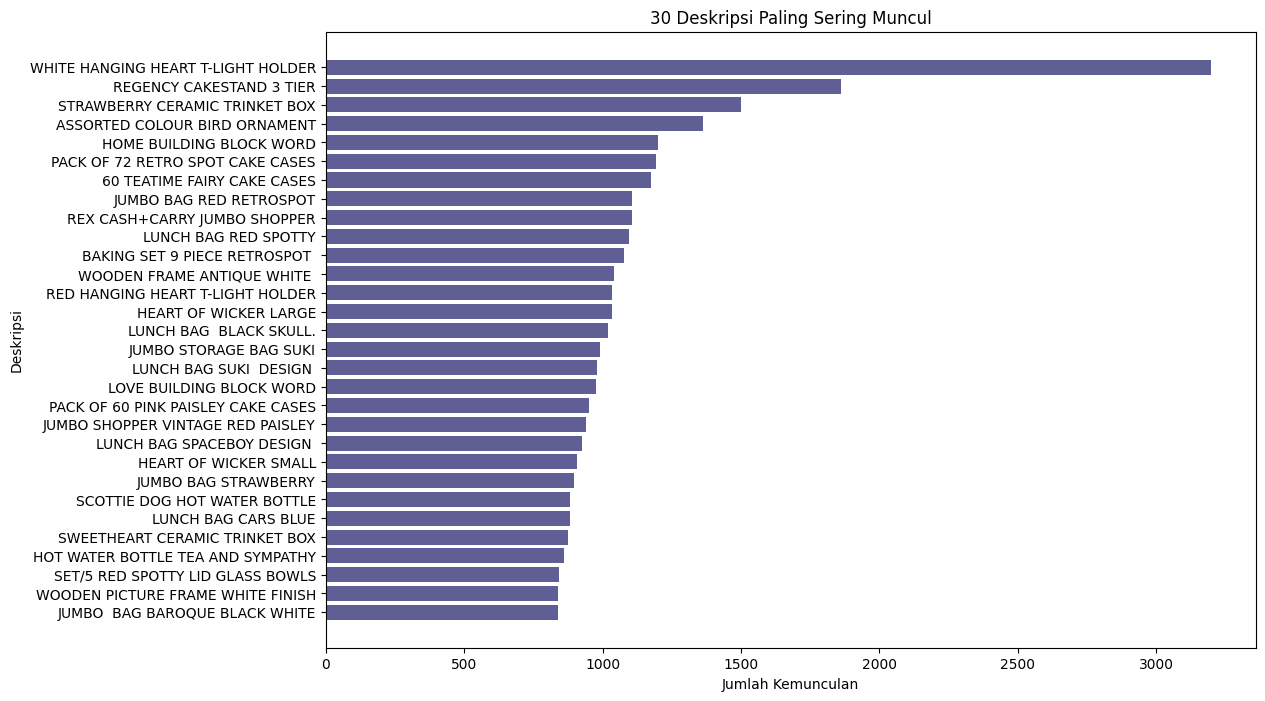

In [ ]:
# Menghitung jumlah kemunculan setiap deskripsi
jumlah_deskripsi = df['Description'].value_counts()

# Ekstrak top 30
deskripsi_30_teratas = jumlah_deskripsi[:30]

# Plot
plt.figure(figsize=(12,8))
plt.barh(deskripsi_30_teratas.index[::-1], deskripsi_30_teratas.values[::-1], color='#5F5F96')

# Menambahkan label dan judul
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Deskripsi')
plt.title('30 Deskripsi Paling Sering Muncul')

# Menampilkan plot
plt.show()

In [ ]:
# Mencari deskripsi yang mengandung karakter lower-case
deskripsi_lower = df['Description'].unique()
deskripsi_lower = [desk for desk in deskripsi_lower if any(char.islower() for char in desk)]

print("Deskripsi yang mengandung karakter huruf kecil :")
print("-"*60)
for desk in deskripsi_lower:
    print(desk)

Deskripsi yang mengandung karakter huruf kecil :
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 40x40cm
POLYESTER FILLER PAD 60x40cm
POLYESTER FILLER PAD 65CMx65CM
POLYESTER FILLER PAD 45x45cm
BAG 125g SWIRLY MARBLES
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
FOLK ART GREETING CARD,pack/12
BAG 250g SWIRLY MARBLES
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 45x30cm
 SET Of 6 SOLDIER SKITTLES
THE KING GIFT BAG 25x24x12cm
FRENCH BLUE METAL DOOR SIGN, No
NUMBER TILE COTTAGE GARDEN, No
NUMBER TILE VINTAGE FONT, No 
NUMBER TILE VINTAGE FONT No 
FRENCH BLUE METAL DOOR SIGN No
NUMBER TILE COTTAGE GARDEN No
3 TRADITIONAl BISCUIT CUTTERS  SET


terdapat sedikit ketidakkonsistenan karena tanda baca seperti koma. Seperti 'NUMBER TILE VINTAGE FONT, No' dan 'NUMBER TILE VINTAGE FONT No'. Kedua barang tersebut merupakan barang yang sama, namun menjadi 2 barang yang berbeda karena penggunaan tanda baca. Untuk menghindari bias, maka hapus tanda baca dan buat semua deskripsi menjadi huruf besar untuk menyamakan deskripsi barang.

In [ ]:
# Hapus tanda baca dan buat semua deskripsi menjadi huruf besar
df['Description'] = df['Description'].str.replace(',', '').str.upper()

In [ ]:
# Mencari deskripsi yang mengandung karakter lower-case
deskripsi_lower = df['Description'].unique()
deskripsi_lower = [desk for desk in deskripsi_lower if any(char.islower() for char in desk)]

print("Deskripsi yang mengandung karakter huruf kecil :")
print("-"*60)
for desk in deskripsi_lower:
    print(desk)

Deskripsi yang mengandung karakter huruf kecil :
------------------------------------------------------------


### Unit Price

In [ ]:
# Cek nilai harga terkecil
df['Price'].min()

0.0

Ada yang harganya 0. Hal ini termasuk anomali karena tidak mungkin dalam transaksi, harga barangnya adalah 0.

In [ ]:
# Cek jumlah barang yang harganya 0
df[df['Price']==0].describe()

Quantity  Price   Customer ID
count   28.000000   28.0     28.000000
mean    30.678571    0.0  14078.142857
std    121.605024    0.0   1736.849931
min      1.000000    0.0  12417.000000
25%      1.000000    0.0  12647.000000
50%      4.000000    0.0  13321.500000
75%     10.500000    0.0  14752.000000
max    648.000000    0.0  18071.000000

terdapat 28 baris yang memiliki harga 0. Jika dilihat dari kuantitasnya,  kuantitas paling banyak yang memiliki harga 0 mencapai 648 barang. Karena jumlahnya sedikit, baris yang harganya 0 dapat dihapus.

In [ ]:
# Filter data yang harganya diatas 0
df = df[df['Price'] > 0]

In [ ]:
df.describe()

Quantity          Price    Customer ID
count  408924.000000  408924.000000  408924.000000
mean       12.975198       3.038019   15359.384431
std       102.252086       4.498340    1679.192994
min     -9360.000000       0.030000   12346.000000
25%         2.000000       1.250000   13983.000000
50%         5.000000       1.950000   15311.000000
75%        12.000000       3.750000   16798.000000
max     19152.000000     295.000000   18287.000000

In [ ]:
# Reset Index
df.reset_index(drop=True, inplace=True)

# Dimensi data
df.shape

(408924, 9)

# Feature Engineering

## Jumlah hari sejak customer melakukan pembelian terakhir

In [ ]:
# Mengubah tipe data InvoiceDate menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Mengubah tipe data InvoiceDate menjadi datetime dan ekstrak tanggalnya
df['TanggalInvoice'] = df['InvoiceDate'].dt.date

# Ekstrak tanggal pembelian paling baru untuk setiap pelanggan
data_pelanggan = df.groupby('Customer ID')['TanggalInvoice'].max().reset_index()

# Menemukan tanggal paling baru dalam seluruh dataset
tanggal_paling_baru = df['TanggalInvoice'].max()

# Mengubah tipe data TanggalInvoice menjadi datetime sebelum dilakukan pengurangan
data_pelanggan['TanggalInvoice'] = pd.to_datetime(data_pelanggan['TanggalInvoice'])
tanggal_paling_baru = pd.to_datetime(tanggal_paling_baru)

# Menghitung jumlah hari sejak pembelian terakhir untuk setiap pelanggan
data_pelanggan['Hari_Sejak_Pembelian_Terakhir'] = (tanggal_paling_baru - data_pelanggan['TanggalInvoice']).dt.days

# Menghapus kolom TanggalInvoice
data_pelanggan.drop(columns=['TanggalInvoice'], inplace=True)

In [ ]:
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir
0      12346.0                            164
1      12347.0                              2
2      12348.0                             73
3      12349.0                             42
4      12351.0                             10

## Total Transaksi

In [ ]:
# Menghitung jumlah transaksi tiap pelanggan
total_transaksi = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
total_transaksi.rename(columns={'Invoice': 'Total_Transaksi'}, inplace=True)

In [ ]:
total_transaksi.head()

Customer ID  Total_Transaksi
0      12346.0                2
1      12347.0                2
2      12348.0                1
3      12349.0                3
4      12351.0                1

## Total produk yang dibeli tiap customer

In [ ]:
# Menghitung jumlah produk yang dibeli tiap pelanggan
total_produk_dibeli = df.groupby('Customer ID')['Quantity'].sum().reset_index()
total_produk_dibeli.rename(columns={'Quantity': 'Total_Produk_Dibeli'}, inplace=True)
total_produk_dibeli.head()

Customer ID  Total_Produk_Dibeli
0      12346.0                   24
1      12347.0                  828
2      12348.0                  372
3      12349.0                  986
4      12351.0                  261

## Merge total transaksi dan total produk dalam data pelanggan

In [ ]:
# Merge
data_pelanggan = pd.merge(data_pelanggan, total_transaksi, on='Customer ID')
data_pelanggan = pd.merge(data_pelanggan, total_produk_dibeli, on='Customer ID')

data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  
0                   24  
1                  828  
2                  372  
3                  986  
4                  261

## Total Belanja

In [ ]:
# Hitung total belanja tiap pelanggan
df['Total_Belanja'] = df['Price'] * df['Quantity']
total_belanja = df.groupby('Customer ID')['Total_Belanja'].sum().reset_index()
total_belanja.head()

Customer ID  Total_Belanja
0      12346.0         169.36
1      12347.0        1323.32
2      12348.0         221.16
3      12349.0        2196.99
4      12351.0         300.93

## Rata-rata belanja

In [ ]:
# Menghitung rata-rata belanja tiap customer
rata_rata_belanja = total_belanja.merge(total_transaksi, on='Customer ID')
rata_rata_belanja['Rata_rata_Belanja'] = rata_rata_belanja['Total_Belanja'] / rata_rata_belanja['Total_Transaksi']
rata_rata_belanja.head()

Customer ID  Total_Belanja  Total_Transaksi  Rata_rata_Belanja
0      12346.0         169.36                2              84.68
1      12347.0        1323.32                2             661.66
2      12348.0         221.16                1             221.16
3      12349.0        2196.99                3             732.33
4      12351.0         300.93                1             300.93

## Merge total belanja dan rata-rata belanja

In [ ]:
#Merge
data_pelanggan = pd.merge(data_pelanggan, total_belanja, on='Customer ID')
data_pelanggan = pd.merge(data_pelanggan, rata_rata_belanja[['Customer ID', 'Rata_rata_Belanja']], on='Customer ID')

data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  
0                   24         169.36              84.68  
1                  828        1323.32             661.66  
2                  372         221.16             221.16  
3                  986        2196.99             732.33  
4                  261         300.93             300.93

## Total Jenis produk yang dibeli

In [ ]:
# Menghitung total jenis produk yang dibeli oleh setiap pelanggan
total_jenis_produk_dibeli = df.groupby('Customer ID')['StockCode'].nunique().reset_index()
total_jenis_produk_dibeli.rename(columns={'StockCode': 'Total_Jenis_Produk_Dibeli'}, inplace=True)

# Merge
data_pelanggan = pd.merge(data_pelanggan, total_jenis_produk_dibeli, on='Customer ID')
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  
0                         24  
1                         70  
2                         19  
3                         91  
4                         21

## Rata-rata Hari Antara Pembelian

In [ ]:
# Ekstrak hari dan jam dari InvoiceDate
df['Hari'] = df['InvoiceDate'].dt.dayofweek
df['Jam'] = df['InvoiceDate'].dt.hour

In [ ]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country Transaction_Status  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            Selesai   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            Selesai   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            Selesai   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom            Selesai   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            Selesai   

  TanggalInvoice  Total_Belanja  Hari  Jam  
0     2009-12-01           83.4     1    7  
1     2009-12-01           81.0     1    7  
2     2009-12-01           81.0     1    7  
3     2009-12-01          100.8     1    7  
4     2009-12-01           30.0     1    7

In [ ]:
# Menghitung rata-rata jumlah hari antara pembelian berturut-turut
hari_antara_pembelian = df.groupby('Customer ID')['InvoiceDate'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
rata_hari_antara_pembelian = hari_antara_pembelian.groupby('Customer ID').mean().reset_index()
rata_hari_antara_pembelian.rename(columns={'InvoiceDate': 'Rata_Hari_Antara_Pembelian'}, inplace=True)

rata_hari_antara_pembelian.head()

Customer ID  Rata_Hari_Antara_Pembelian
0      12346.0                    5.130435
1      12347.0                    0.528571
2      12348.0                    0.000000
3      12349.0                    3.144231
4      12351.0                    0.000000

## Hari favorit melakukan belanja

In [ ]:
# hari berbelanja favorit
hari_belanja_favorit = df.groupby(['Customer ID', 'Hari']).size().reset_index(name='Jumlah')
hari_belanja_favorit = hari_belanja_favorit.loc[hari_belanja_favorit.groupby('Customer ID')['Jumlah'].idxmax()][['Customer ID', 'Hari']]

hari_belanja_favorit.head()

Customer ID  Hari
0      12346.0     0
3      12347.0     6
4      12348.0     0
5      12349.0     3
7      12351.0     0

## Jam belanja favorit

In [ ]:
# jam berbelanja favorit
jam_belanja_favorit = df.groupby(['Customer ID', 'Jam']).size().reset_index(name='Jumlah')
jam_belanja_favorit = jam_belanja_favorit.loc[jam_belanja_favorit.groupby('Customer ID')['Jumlah'].idxmax()][['Customer ID', 'Jam']]

jam_belanja_favorit

Customer ID  Jam
0          12346.0   13
1          12347.0   14
2          12348.0   14
3          12349.0    8
6          12351.0   15
...            ...  ...
12878      18283.0   13
12881      18284.0   11
12882      18285.0   10
12884      18286.0   11
12886      18287.0   11

[4314 rows x 2 columns]

## Merge rata-rata hari antara pembelian, Hari dan jam favorit berbelanja

In [ ]:
# Merge
data_pelanggan = pd.merge(data_pelanggan, rata_hari_antara_pembelian, on='Customer ID')
data_pelanggan = pd.merge(data_pelanggan, hari_belanja_favorit, on='Customer ID')
data_pelanggan = pd.merge(data_pelanggan, jam_belanja_favorit, on='Customer ID')

data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  
0                         24                    5.130435     0   13  
1                         70                    0.528571     6   14  
2                         19                    0.000000     0   14  
3                         91                    3.144231     3    8  
4                         21                    0.000000     0   15

## Negara Asal

In [ ]:
df['Country'].value_counts(normalize=True).head()

United Kingdom    0.909384
EIRE              0.020935
Germany           0.019121
France            0.013457
Netherlands       0.006581
Name: Country, dtype: float64

90% Customer berasal dari United Kingdom. Buat fitur baru yang menandakan apakah seorang customer berasal dari UK atau tidak untuk memperkecil dimensi.

In [ ]:
# Mengelompokkan berdasarkan CustomerID dan Country untuk mendapatkan jumlah transaksi per negara untuk setiap pelanggan
negara_pelanggan = df.groupby(['Customer ID', 'Country']).size().reset_index(name='Jumlah_Transaksi')

In [ ]:
# Ambil negara dengan jumlah transaksi terbanyak untuk setiap pelanggan
negara_pelanggan_utama = negara_pelanggan.sort_values('Jumlah_Transaksi', ascending=False).drop_duplicates('Customer ID')

In [ ]:
# Membuat kolom biner yang menunjukkan apakah pelanggan berasal dari UK atau tidak
negara_pelanggan_utama['Is_UK'] = negara_pelanggan_utama['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

In [ ]:
# Menggabungkan data ini dengan dataframe data_pelanggan
data_pelanggan = pd.merge(data_pelanggan, negara_pelanggan_utama[['Customer ID', 'Is_UK']], on='Customer ID', how='left')
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  
0                         24                    5.130435     0   13      1  
1                         70                    0.528571     6   14      0  
2                         19                    0.000000     0   14      0  
3                         91                    3.144231     3    8      0  
4                         21                    0.000000     0   15      0

## Total Pembatalan

In [ ]:
# Hitung total jumlah transaksi
total_transaksi = df.groupby('Customer ID')['Invoice'].nunique().reset_index()

In [ ]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country Transaction_Status  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            Selesai   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            Selesai   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            Selesai   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom            Selesai   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            Selesai   

  TanggalInvoice  Total_Belanja  Hari  Jam  
0     2009-12-01           83.4     1    7  
1     2009-12-01           81.0     1    7  
2     2009-12-01           81.0     1    7  
3     2009-12-01          100.8     1    7  
4     2009-12-01           30.0     1    7

In [ ]:
# Menghitung jumlah transaksi yang dibatalkan
transaksi_dibatalkan = df[df['Transaction_Status'] == 'Dibatalkan']
frekuensi_pembatalan = transaksi_dibatalkan.groupby('Customer ID')['Invoice'].nunique().reset_index()
frekuensi_pembatalan.rename(columns={'Invoice': 'Frekuensi_Pembatalan'}, inplace=True)
frekuensi_pembatalan.head()

Customer ID  Frekuensi_Pembatalan
0      12349.0                     1
1      12359.0                     2
2      12380.0                     1
3      12391.0                     1
4      12393.0                     1

In [ ]:
# Merge ke data pelanggan
data_pelanggan = pd.merge(data_pelanggan, frekuensi_pembatalan, on='Customer ID', how='left')
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                    0.000000     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                    0.000000     0   15      0   

   Frekuensi_Pembatalan  
0                   NaN  
1                   NaN  
2                   NaN  
3                   1.0  
4                   NaN

In [ ]:
# Mengganti nilai NaN dengan 0
data_pelanggan['Frekuensi_Pembatalan'].fillna(0, inplace=True)

In [ ]:
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                    0.000000     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                    0.000000     0   15      0   

   Frekuensi_Pembatalan  
0                   0.0  
1                   0.0  
2                   0.0  
3                   1.0  
4                   0.0

## Tingkat Pembatalan

In [ ]:
# Hitung Tingkat Pembatalan
data_pelanggan['Tingkat_Pembatalan'] = data_pelanggan['Frekuensi_Pembatalan'] / total_transaksi['Invoice']
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                    0.000000     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                    0.000000     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  
0                   0.0            0.000000  
1                   0.0            0.000000  
2                   0.0            0.000000  
3                   1.0            0.333333  
4                   0.0            0.000000

## Rata-rata belanja per bulan

In [ ]:
# Ekstrak bulan dan tahun dari InvoiceDate
df['Tahun'] = df['InvoiceDate'].dt.year
df['Bulan'] = df['InvoiceDate'].dt.month

In [ ]:
# Hitung pengeluaran bulanan untuk setiap pelanggan
pengeluaran_bulanan = df.groupby(['Customer ID', 'Tahun', 'Bulan'])['Total_Belanja'].sum().reset_index()

In [ ]:
pengeluaran_bulanan.head()

Customer ID  Tahun  Bulan  Total_Belanja
0      12346.0   2010      3          27.05
1      12346.0   2010      6         142.31
2      12347.0   2010     10         611.53
3      12347.0   2010     12         711.79
4      12348.0   2010      9         221.16

### Rata-rata dan standar deviasi belanja bulanan

In [ ]:
# Pola Pembelian Musiman
pola_pembelian_musiman = pengeluaran_bulanan.groupby('Customer ID')['Total_Belanja'].agg(['mean', 'std']).reset_index()
pola_pembelian_musiman.rename(columns={'mean': 'Rata_Bulan', 'std': 'Std_Bulan'}, inplace=True)

In [ ]:
pola_pembelian_musiman.head()

Customer ID  Rata_Bulan   Std_Bulan
0      12346.0       84.68   81.501128
1      12347.0      661.66   70.894526
2      12348.0      221.16         NaN
3      12349.0      732.33  656.479014
4      12351.0      300.93         NaN

In [ ]:
# Mengganti nilai NaN pada Std_Bulan dengan 0
pola_pembelian_musiman['Std_Bulan'].fillna(0, inplace=True)

In [ ]:
# Merge
data_pelanggan = pd.merge(data_pelanggan, pola_pembelian_musiman, on='Customer ID')

In [ ]:
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0      12346.0                            164                2   
1      12347.0                              2                2   
2      12348.0                             73                1   
3      12349.0                             42                3   
4      12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                    0.000000     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                    0.000000     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan   Std_Bulan  
0                   0.0            0.000000       84.68   81.501128  
1                   0.0            0.000000      661.66   70.894526  
2                   0.0            0.000000      221.16    0.000000  
3                   1.0            0.333333      732.33  656.479014  
4                   0.0            0.000000      300.93    0.000000

## Ubah tipe data Customer ID

In [ ]:
# Ubah tipe data 'CustomerI D' menjadi str
data_pelanggan['Customer ID'] = data_pelanggan['Customer ID'].astype(str)
data_pelanggan = data_pelanggan.convert_dtypes()

In [ ]:
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                            164                2   
1     12347.0                              2                2   
2     12348.0                             73                1   
3     12349.0                             42                3   
4     12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                         0.0     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                         0.0     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan   Std_Bulan  
0                     0                 0.0       84.68   81.501128  
1                     0                 0.0      661.66   70.894526  
2                     0                 0.0      221.16         0.0  
3                     1            0.333333      732.33  656.479014  
4                     0                 0.0      300.93         0.0

## Deskripsi Fitur Data Pelanggan

- **Customer ID**: Identifier unik untuk membedakan setiap pelanggan.
- **Hari_Sejak_Pembelian_Terakhir**: Jumlah hari sejak pembelian terakhir pelanggan.
- **Total_Transaksi**: Total jumlah transaksi yang dilakukan pelanggan.
- **Total_Produk_Dibeli**: Jumlah total produk yang dibeli pelanggan.
- **Total_Belanja**: Total uang yang dihabiskan pelanggan.
- **Rata_rata_Belanja**: Nilai rata-rata setiap transaksi pelanggan.
- **Total_Jenis_Produk_Dibeli**: Jumlah produk berbeda yang telah dibeli pelanggan.
- **Rata_Hari_Antara_Pembelian**: Rata-rata hari antara pembelian berturut-turut.
- **Hari**: Hari pelanggan cenderung berbelanja.
- **Jam**: Jam pelanggan cenderung berbelanja.
- **Is_UK**: Variabel biner menunjukkan apakah pelanggan berbasis di Inggris.
- **Frekuensi_Pembatalan**: Jumlah total transaksi yang dibatalkan oleh pelanggan.
- **Tingkat_Pembatalan**: Proporsi transaksi yang dibatalkan dari total transaksi.
- **Rata_Bulan**: Rata-rata pengeluaran bulanan pelanggan.
- **Std_Bulan**: Deviasi standar pengeluaran bulanan, menunjukkan variabilitas dalam pola pengeluaran pelanggan.

In [ ]:
data_pelanggan.to_csv('data_pelanggan_cleaned.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country Transaction_Status  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            Selesai   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            Selesai   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            Selesai   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom            Selesai   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            Selesai   

  TanggalInvoice  Total_Belanja  Hari  Jam  Tahun  Bulan  
0     2009-12-01           83.4     1    7   2009     12  
1     2009-12-01           81.0     1    7   2009     12  
2     2009-12-01           81.0     1    7   2009     12  
3     2009-12-01          100.8     1    7   2009     12  
4     2009-12-01           30.0     1    7   2009     12

## Status Transaksi

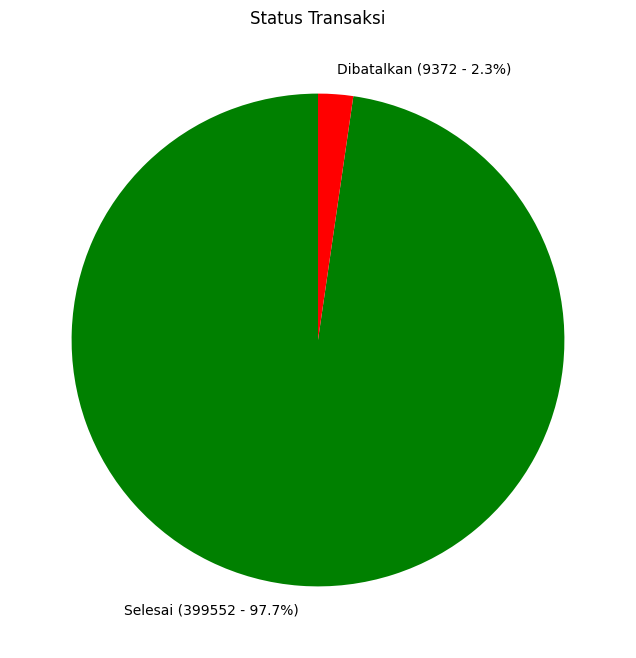

In [ ]:
# Count
transaction_status_counts = df['Transaction_Status'].value_counts()

# Labels
labels = [f'{status} ({count} - {count / len(df) * 100:.1f}%)' for status, count in zip(transaction_status_counts.index, transaction_status_counts)]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(transaction_status_counts, labels=labels, autopct='', startangle=90, colors=['green', 'red'])
plt.title('Status Transaksi')
plt.show()

terdapat 9372 (2.3%) transaksi yang dibatalkan dan transaksi selesai sebesar 399552 (97.7%) transaksi berstatus selesai.

## Negara Asal

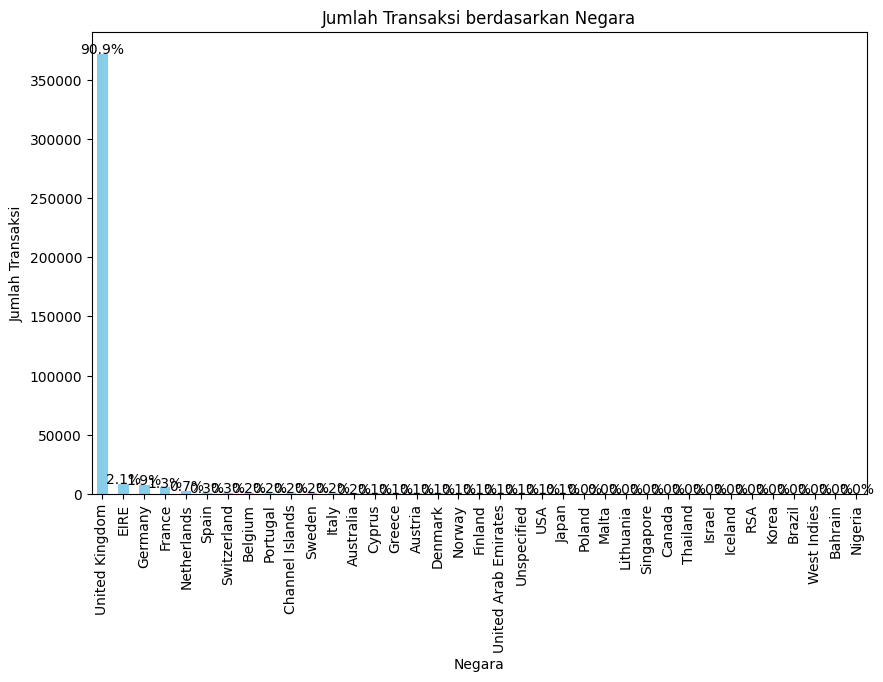

In [ ]:
# Count
country_counts = df['Country'].value_counts()

# Persentase
percentages = (country_counts / len(df)) * 100

# Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Transaksi berdasarkan Negara')
plt.xlabel('Negara')
plt.ylabel('Jumlah Transaksi')

for i, v in enumerate(country_counts):
    plt.text(i, v + 0.5, f'{percentages[i]:.1f}%', ha='center')

plt.show()

90.9% transaksi berasal dari negara United Kingdom dan diikuti oleh Irlandia sebanyak 2.1% transaksi.

## Jumlah Transaksi dari Waktu ke waktu

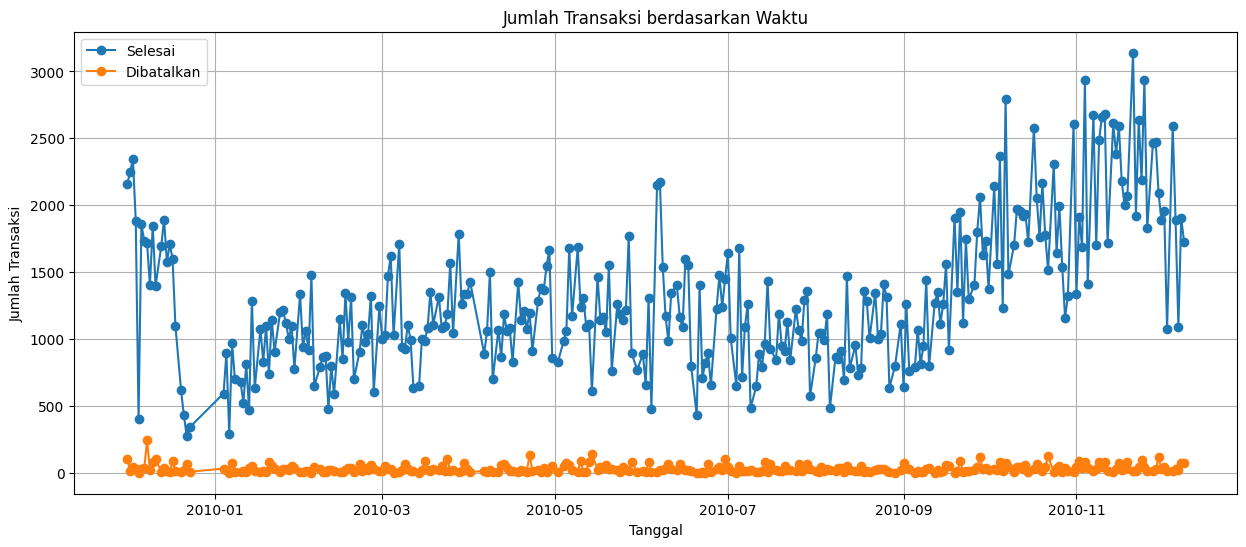

In [ ]:
status_over_time = df.groupby(['TanggalInvoice', 'Transaction_Status']).size().unstack().fillna(0)

# Line Chart
plt.figure(figsize=(15, 6))
plt.plot(status_over_time.index, status_over_time['Selesai'], label='Selesai', marker='o')
plt.plot(status_over_time.index, status_over_time['Dibatalkan'], label='Dibatalkan', marker='o')

plt.title('Jumlah Transaksi berdasarkan Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.legend()
plt.grid(True)
plt.show()

Dapat dilihat terjadi kenaikan jumlah transaksi dimulai dari tahun 2010 bulan 9 hingga bulan 12 yang ditandai adanya tren naik.

## Distribusi Frekuensi Pembelian

In [ ]:
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                            164                2   
1     12347.0                              2                2   
2     12348.0                             73                1   
3     12349.0                             42                3   
4     12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                         0.0     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                         0.0     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan   Std_Bulan  
0                     0                 0.0       84.68   81.501128  
1                     0                 0.0      661.66   70.894526  
2                     0                 0.0      221.16         0.0  
3                     1            0.333333      732.33  656.479014  
4                     0                 0.0      300.93         0.0

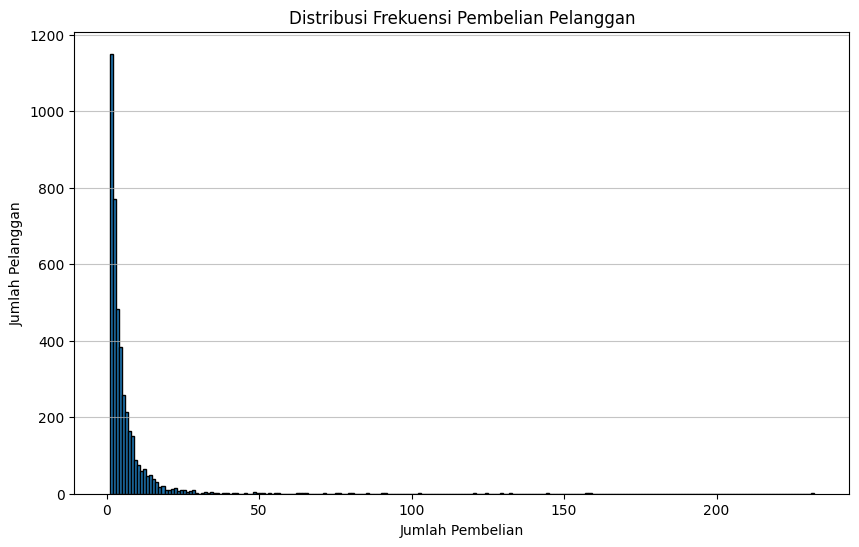

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data_pelanggan['Total_Transaksi'], bins=range(min(data_pelanggan['Total_Transaksi']), max(data_pelanggan['Total_Transaksi']) + 1, 1), edgecolor='black')
plt.title('Distribusi Frekuensi Pembelian Pelanggan')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
from scipy.stats import skew

skewness = skew(data_pelanggan['Total_Transaksi'].tolist())

print(f"Skewness: {skewness}")

Skewness: 9.54964775093065


Dengan nilai Skewness sebesar 9.5496 yang menandakan skewness positif yang artinya mayoritas pelanggan melakukan pembelian dalam jumlah yang relatif kecil, namun ada beberapa pelanggan (outlier) yang melakukan jumlah pembelian jauh lebih tinggi.

## Distribusi Total Belanja

In [ ]:
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                            164                2   
1     12347.0                              2                2   
2     12348.0                             73                1   
3     12349.0                             42                3   
4     12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                         0.0     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                         0.0     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan   Std_Bulan  
0                     0                 0.0       84.68   81.501128  
1                     0                 0.0      661.66   70.894526  
2                     0                 0.0      221.16         0.0  
3                     1            0.333333      732.33  656.479014  
4                     0                 0.0      300.93         0.0

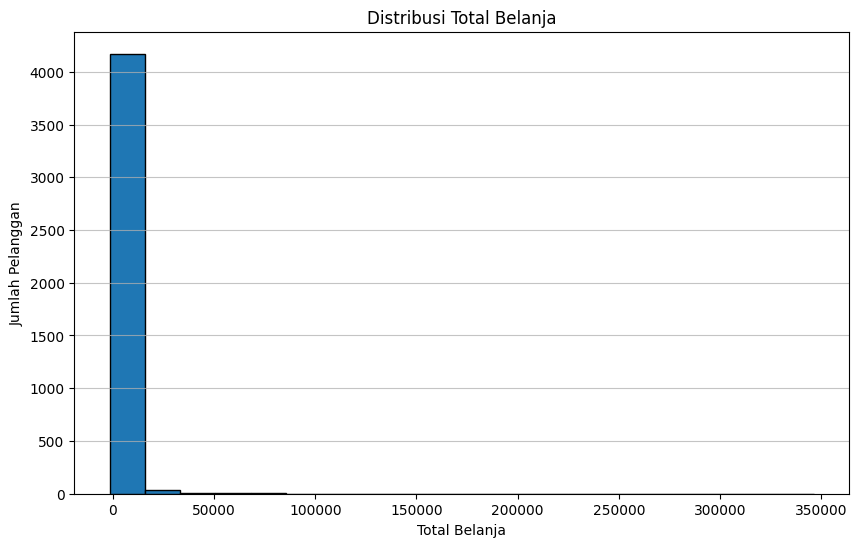

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data_pelanggan['Total_Belanja'], bins=20, edgecolor='black')
plt.title('Distribusi Total Belanja')
plt.xlabel('Total Belanja')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.75)
plt.show()

Total belanja mayoritas pelanggan relatif kecil. Tetapi terdapat beberapa pelanggan yang telah berbelanja dengan nilai yang cukup besar

## Loyalitas Pelanggan

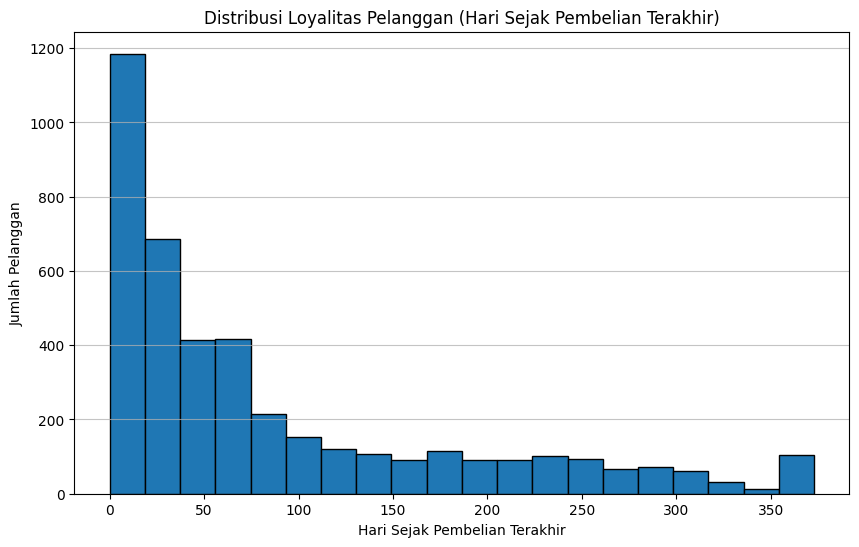

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data_pelanggan['Hari_Sejak_Pembelian_Terakhir'], bins=20, edgecolor='black')
plt.title('Distribusi Loyalitas Pelanggan (Hari Sejak Pembelian Terakhir)')
plt.xlabel('Hari Sejak Pembelian Terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.75)
plt.show()

Skewness positif menunjukkan skenario yang menjelaskan perilaku pembelian pelanggan terkonsentrasi pada transaksi yang lebih baru, namun terdapat outlier yang tidak melakukan pembelian dalam jangka waktu yang cukup lama.

## Loyalitas Pelanggan berdasarkan Rentang Pembelian

In [ ]:
data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                            164                2   
1     12347.0                              2                2   
2     12348.0                             73                1   
3     12349.0                             42                3   
4     12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                         0.0     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                         0.0     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan   Std_Bulan  
0                     0                 0.0       84.68   81.501128  
1                     0                 0.0      661.66   70.894526  
2                     0                 0.0      221.16         0.0  
3                     1            0.333333      732.33  656.479014  
4                     0                 0.0      300.93         0.0

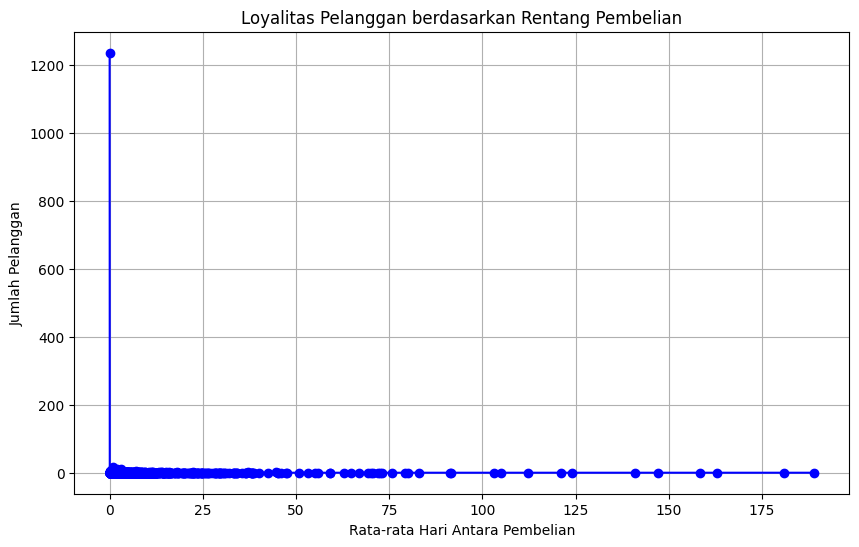

In [ ]:
loyalty_over_time = data_pelanggan.groupby('Rata_Hari_Antara_Pembelian')['Customer ID'].count()

# Plot
plt.figure(figsize=(10, 6))
loyalty_over_time.plot(marker='o', linestyle='-', color='b')
plt.title('Loyalitas Pelanggan berdasarkan Rentang Pembelian')
plt.xlabel('Rata-rata Hari Antara Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

Mayoritas pelanggan melakukan pembelian secara rutin,

## Distribusi Pembatalan Transaksi

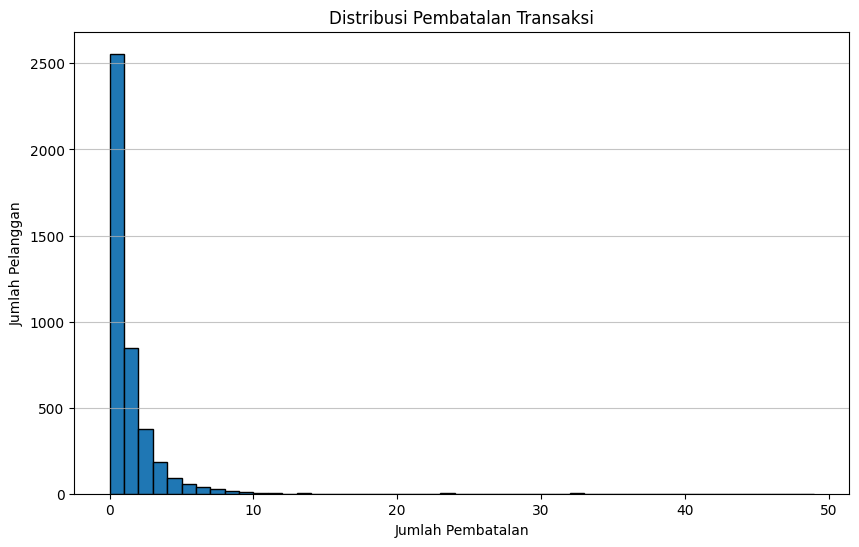

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data_pelanggan['Frekuensi_Pembatalan'], bins=range(0, max(data_pelanggan['Frekuensi_Pembatalan']) + 1, 1), edgecolor='black')
plt.title('Distribusi Pembatalan Transaksi')
plt.xlabel('Jumlah Pembatalan')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.75)
plt.show()

Sebagian besar pelanggan memiliki jumlah pembatalan yang lebih rendah, namun ada beberapa pelanggan dengan jumlah pembatalan yang sangat tinggi, sehingga menyebabkan perluasan distribusi.

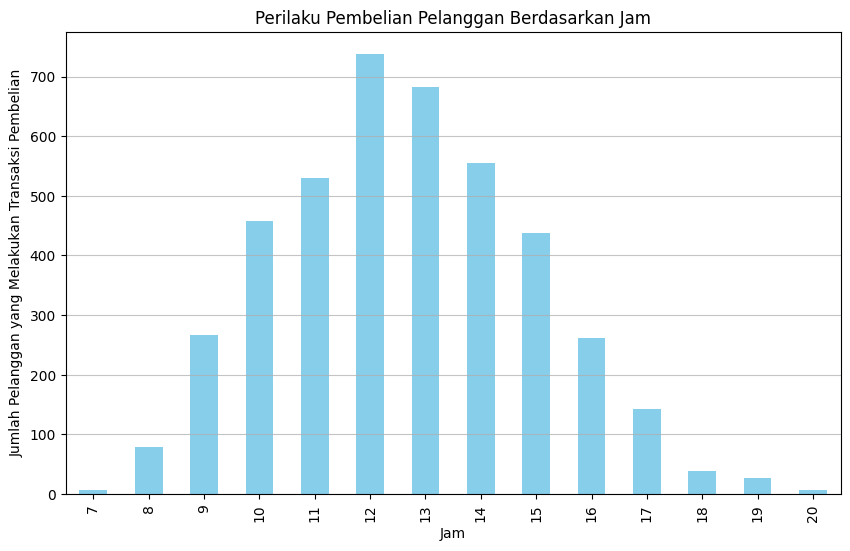

In [ ]:
plt.figure(figsize=(10, 6))
data_pelanggan['Jam'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Perilaku Pembelian Pelanggan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pelanggan yang Melakukan Transaksi Pembelian')
plt.grid(axis='y', alpha=0.75)
plt.show()

Mayoritas pelanggan lebih suka melakukan pembelian di pagi hingga sore hari, mulai dari jam 9 pagi sampai jam 4 sore dengan transaksi terbanyak terjadi di jam 12 siang yang menjadikan jam 12 siang menjadi *golden hour*.

## Perilaku Pembelian Pelanggan Berdasarkan Hari

In [ ]:
data_pelanggan['Hari'].value_counts().sort_index()

0    652
1    776
2    752
3    861
4    519
5      2
6    667
Name: Hari, dtype: Int64

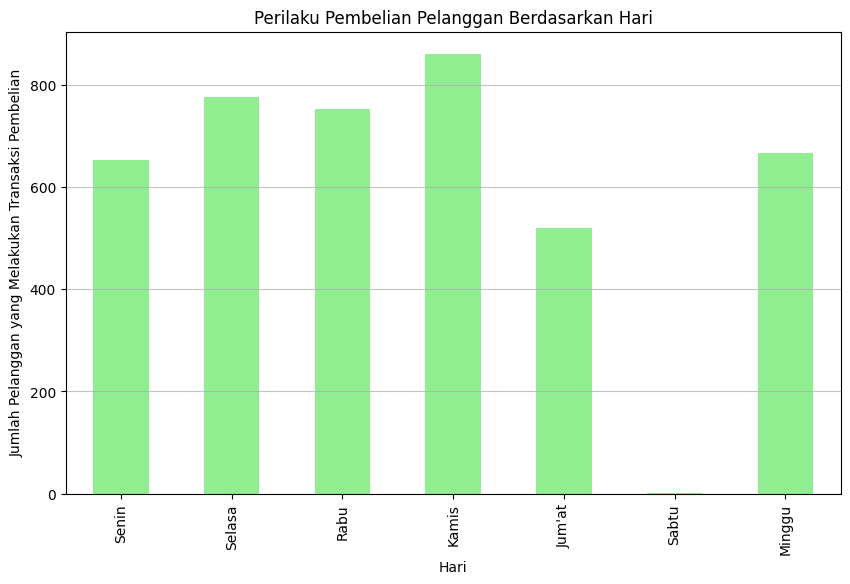

In [ ]:
plt.figure(figsize=(10, 6))
data_pelanggan['Hari'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Perilaku Pembelian Pelanggan Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pelanggan yang Melakukan Transaksi Pembelian')
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jum\'at', 'Sabtu', 'Minggu'])
plt.grid(axis='y', alpha=0.75)
plt.show()

Lebih banyak pelanggan yang cenderung melakukan pembelian di hari kamis. Sedangkan pada hari Sabtu, sangat sedikit jumlah pelanggan yang melakukan pembelian pada hari tersebut. Sehingga Sabtu menjadi hari yang paling tidak disukai bagi pelanggan untuk berbelanja atau melakukan transaksi.

# Outlier

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
outliers = lof.fit_predict(data_pelanggan)

data_pelanggan["LOF"] = outliers
data_pelanggan['Is_Outlier'] = [1 if x == -1 else 0 for x in data_pelanggan["LOF"]]

data_pelanggan.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                            164                2   
1     12347.0                              2                2   
2     12348.0                             73                1   
3     12349.0                             42                3   
4     12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                         0.0     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                         0.0     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan   Std_Bulan  LOF  \
0                     0                 0.0       84.68   81.501128    1   
1                     0                 0.0      661.66   70.894526    1   
2                     0                 0.0      221.16         0.0    1   
3                     1            0.333333      732.33  656.479014    1   
4                     0                 0.0      300.93         0.0    1   

   Is_Outlier  
0           0  
1           0  
2           0  
3           0  
4           0

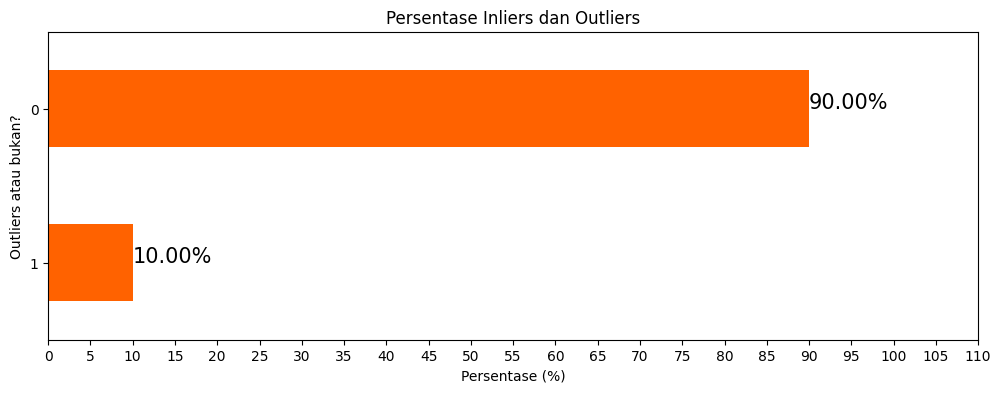

In [ ]:
outlier_percentage = data_pelanggan['Is_Outlier'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Persentase Inliers dan Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Persentase (%)')
plt.ylabel('Outliers atau bukan?')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Separate the outliers for analysis
outliers_data = data_pelanggan[data_pelanggan['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
data_pelanggan_cleaned = data_pelanggan[data_pelanggan['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
data_pelanggan_cleaned = data_pelanggan_cleaned.drop(columns=['LOF', 'Is_Outlier'])

# Reset the index of the cleaned data
data_pelanggan_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
data_pelanggan_cleaned.shape[0]

3806

# Correlation Analysis

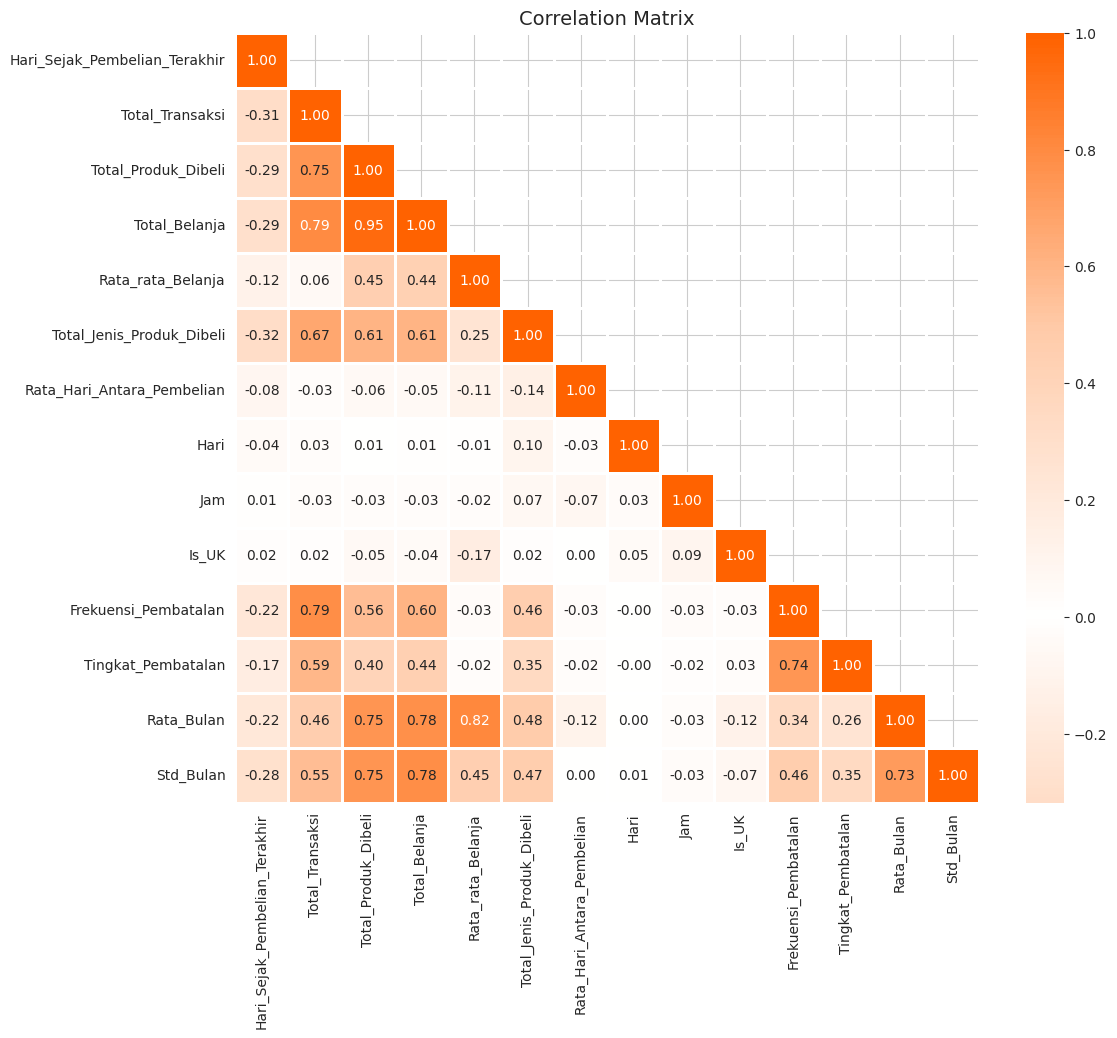

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = data_pelanggan_cleaned.drop(columns=['Customer ID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Banyak fitur yang memiliki korelasi yang tinggi antara satu sama lain yang mengindikasikan adanya multikolinearitas. Hal ini menunjukkan bahwa data dapat direduksi menjadi dimensi yang lebih kecil berdasarkan variansnnya menggunakan PCA.

# Scaling (Standarisasi)

In [ ]:
data_pelanggan_cleaned.columns

Index(['Customer ID', 'Hari_Sejak_Pembelian_Terakhir', 'Total_Transaksi',
       'Total_Produk_Dibeli', 'Total_Belanja', 'Rata_rata_Belanja',
       'Total_Jenis_Produk_Dibeli', 'Rata_Hari_Antara_Pembelian', 'Hari',
       'Jam', 'Is_UK', 'Frekuensi_Pembatalan', 'Tingkat_Pembatalan',
       'Rata_Bulan', 'Std_Bulan'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['Customer ID', 'Is_UK', 'Hari']

# List of columns that need to be scaled
columns_to_scale = data_pelanggan_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
data_pelanggan_scaled = data_pelanggan_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
data_pelanggan_scaled[columns_to_scale] = scaler.fit_transform(data_pelanggan_scaled[columns_to_scale])

# Display the first few rows of the scaled data
data_pelanggan_scaled.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                       0.835966        -0.438042   
1     12347.0                      -0.882890        -0.438042   
2     12348.0                      -0.129564        -0.582075   
3     12349.0                      -0.458481        -0.294008   
4     12351.0                      -0.798008        -0.582075   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0            -0.600730      -0.537908          -1.047724   
1             0.026633      -0.037174           2.290348   
2            -0.329185      -0.515430          -0.258130   
3             0.149921       0.341935           2.699203   
4            -0.415799      -0.480816           0.203373   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari       Jam  \
0                  -0.520765                    0.228689     0  0.150301   
1                   0.085704                   -0.303516     6  0.590676   
2                  -0.586685                   -0.364645     0  0.590676   
3                   0.362569                   -0.001015     3 -2.051572   
4                  -0.560317                   -0.364645     0  1.031051   

   Is_UK  Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan  Std_Bulan  
0      1             -0.482834           -0.358638   -1.029984  -0.287261  
1      0             -0.482834           -0.358638    1.218095  -0.337137  
2      0             -0.482834           -0.358638   -0.498219  -0.670507  
3      0              0.065069           -0.066059    1.493446   2.416480  
4      0             -0.482834           -0.358638   -0.187412  -0.670507

# PCA (Dimensionality Reduction)

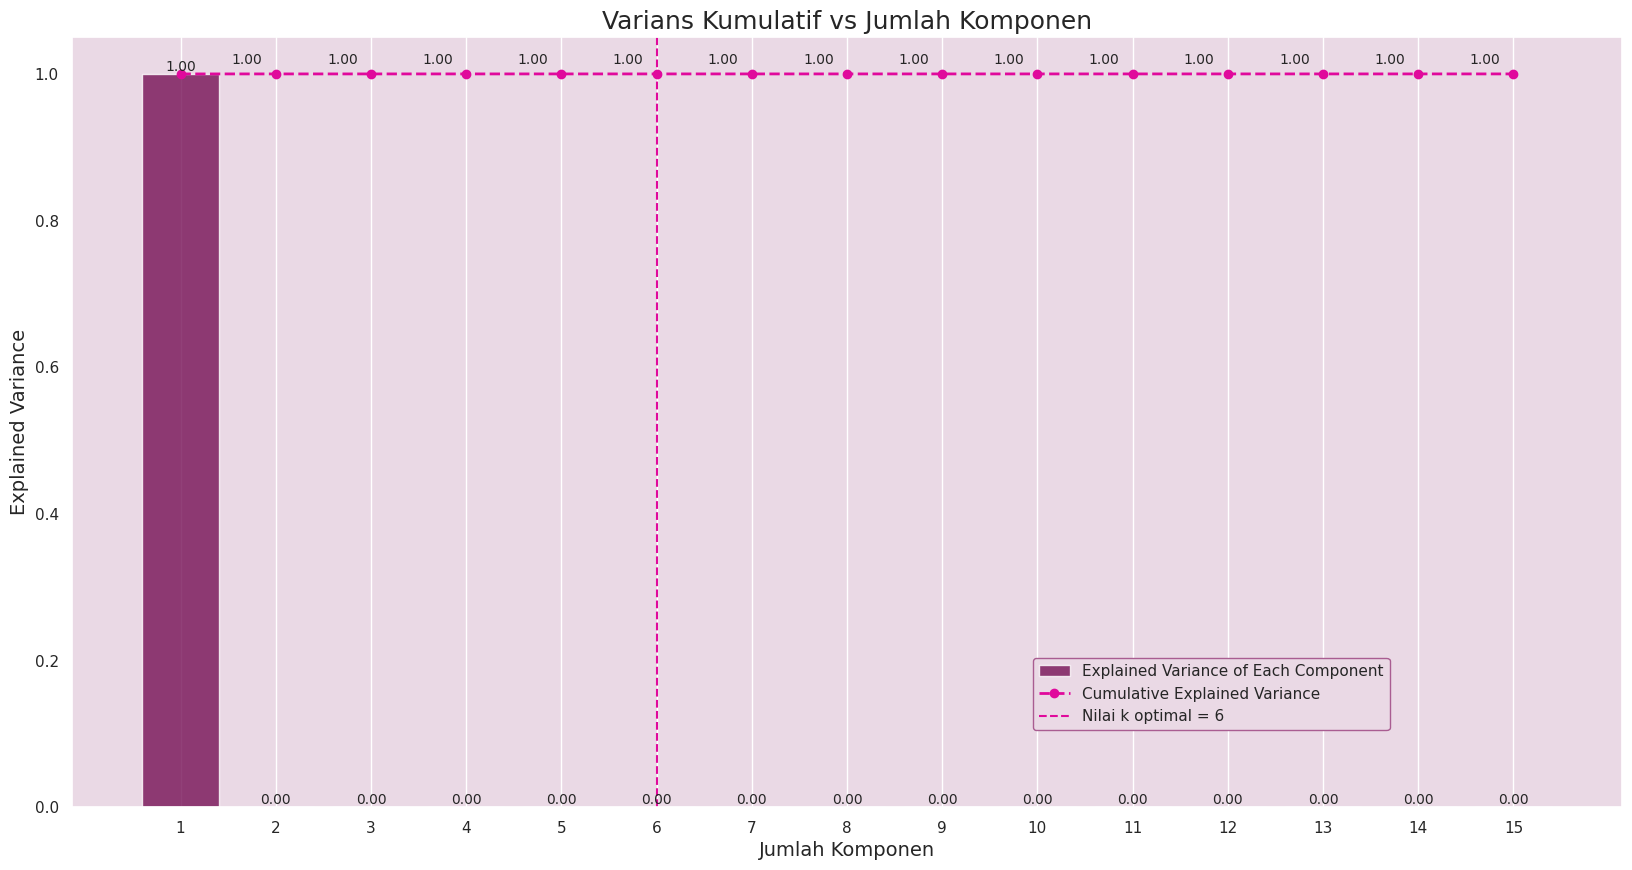

In [ ]:
from sklearn.decomposition import PCA

# Setting CustomerID as the index column
# data_pelanggan_scaled.set_index('Customer ID', inplace=True)

# Apply PCA
pca = PCA().fit(data_pelanggan_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#ead9e5'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#87005c',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#e0099c', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='#e0099c', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Jumlah Komponen', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Varians Kumulatif vs Jumlah Komponen', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Nilai k optimal = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#a95d91')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

Plot dan nilai kumulatif varians dijelaskan mengindikasikan seberapa banyak varians total dalam dataset yang ditangkap oleh setiap komponen utama, serta varians kumulatif yang dijelaskan oleh n komponen pertama.

* Komponen pertama bersama-sama dapat menjelaskan 35% varians
* komponen kedua bersama-sama dapat menjelaskan 59% varians
dst

Untuk memilih jumlah komponen optimal, umumnya kita mencari titik di mana penambahan komponen lain tidak secara signifikan meningkatkan varians yang dijelaskan kumulatif, sering disebut sebagai titik "siku" dalam kurva.



In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
data_pelanggan_pca = pca.fit_transform(data_pelanggan_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
data_pelanggan_pca = pd.DataFrame(data_pelanggan_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
data_pelanggan_pca.index = data_pelanggan_scaled.index

In [ ]:
data_pelanggan_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  3022.705325 -2.255368  2.327722  0.774400 -0.294429  0.100825
1  3021.705502  0.480480 -3.491554 -2.178037 -0.191958  0.764534
2  3020.705456 -1.829778  2.338854  0.044975 -0.668220  0.642826
3  3019.705923  1.921583 -0.281616 -2.509720  1.517922 -1.266186
4  3017.705490 -1.538528  2.342569 -0.311380 -0.701395  1.289384

In [ ]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #b29037 ' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=data_pelanggan_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

# Clustering

## Clustering using K-Means

In [ ]:
if 'cluster' in data_pelanggan_pca.columns:
    data_pelanggan_pca.drop(columns='cluster', inplace=True)

data_pelanggan_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  3022.705325 -2.255368  2.327722  0.774400 -0.294429  0.100825
1  3021.705502  0.480480 -3.491554 -2.178037 -0.191958  0.764534
2  3020.705456 -1.829778  2.338854  0.044975 -0.668220  0.642826
3  3019.705923  1.921583 -0.281616 -2.509720  1.517922 -1.266186
4  3017.705490 -1.538528  2.342569 -0.311380 -0.701395  1.289384

### Determining the Optimal Number of Clusters

#### Elbow Method

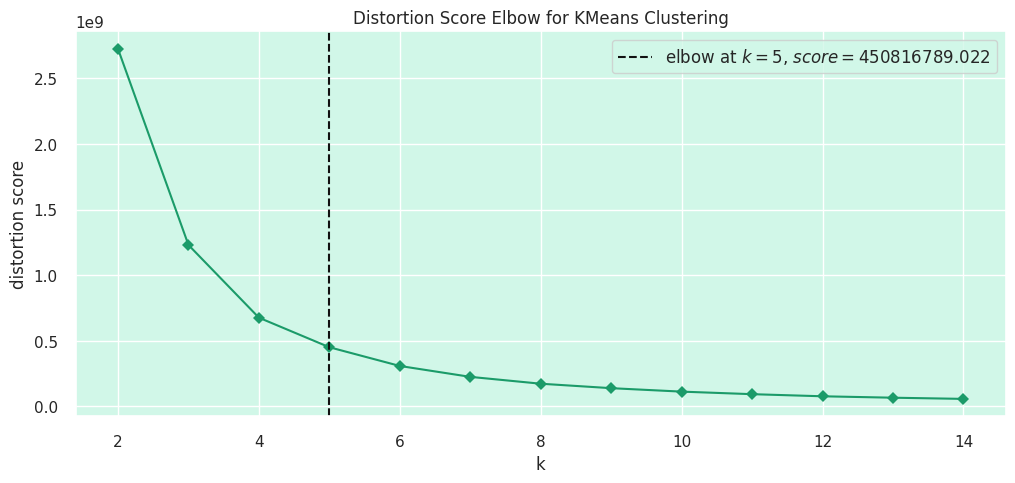

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#d1f7e8'})

# Set the color palette for the plot
sns.set_palette(['#1b9b69'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='random', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(data_pelanggan_pca)

# Finalize and render the figure
visualizer.show();

#### Silhouette Method

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from matplotlib.gridspec import GridSpec

def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

<ipython-input-102-20db4ae913b2>:66: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


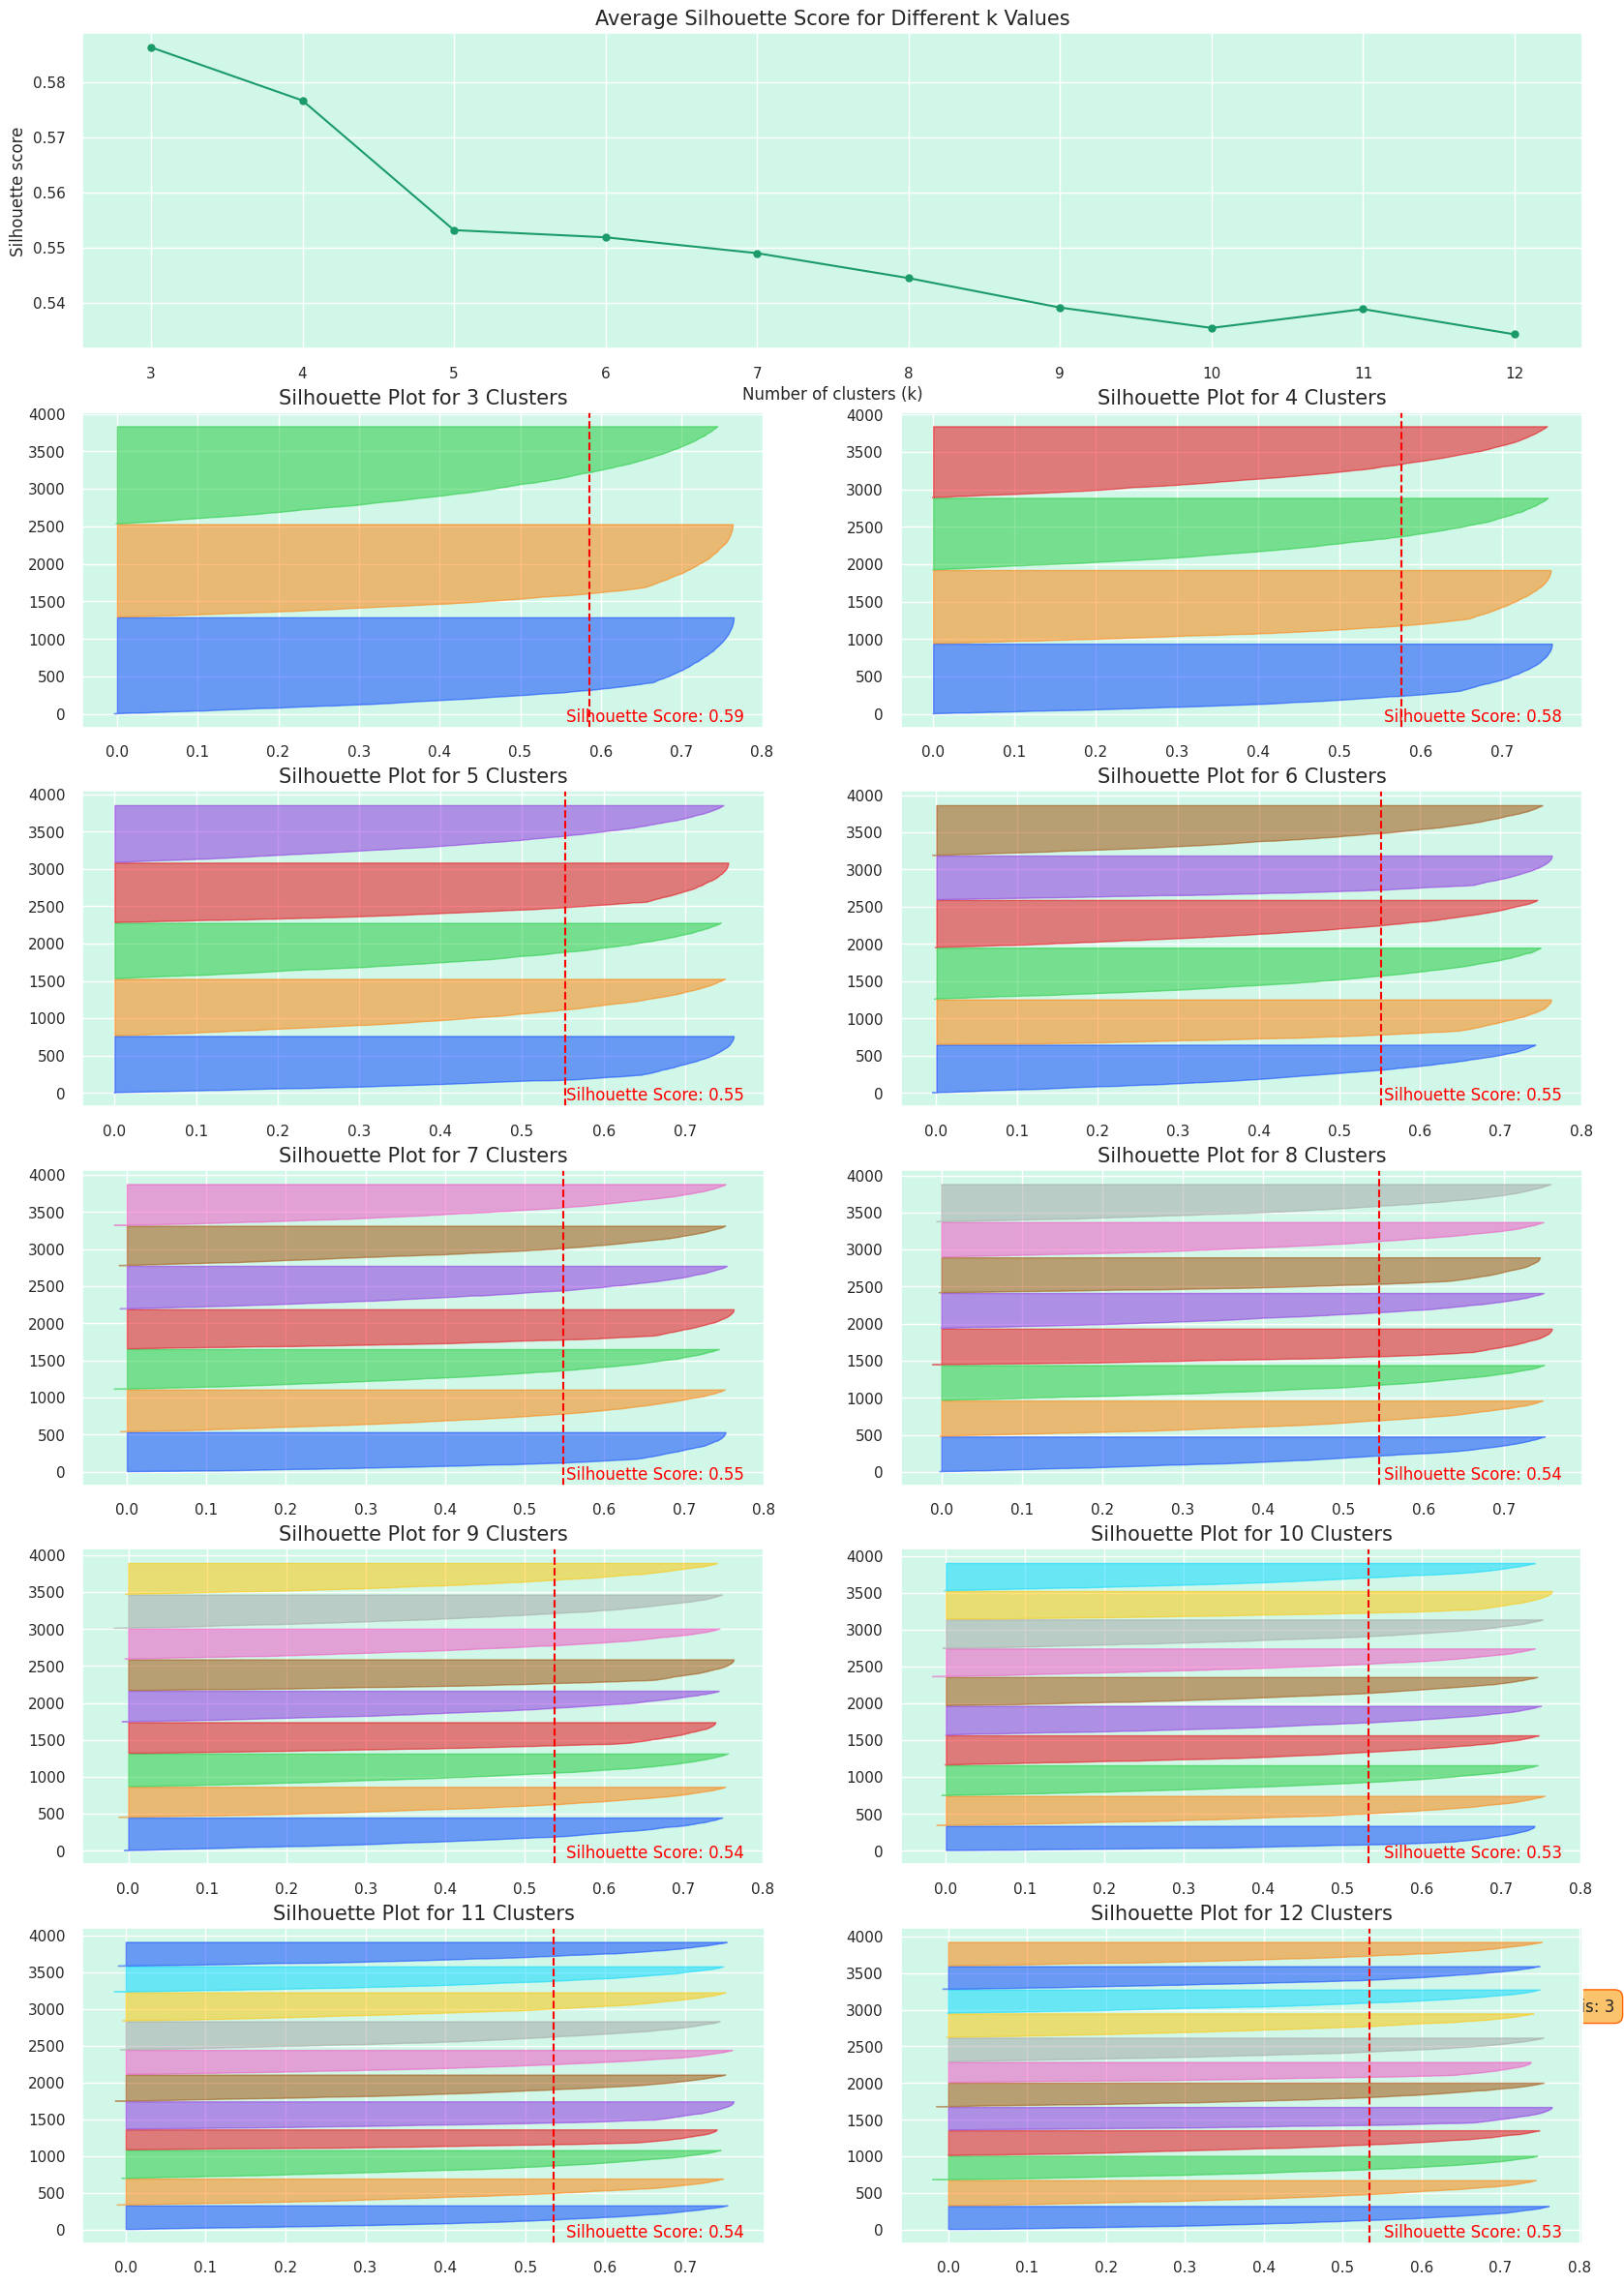

In [ ]:
silhouette_analysis(data_pelanggan_pca, 3, 12, figsize=(20, 50))

Kesimpulan : **K = 3**

### Clustering

In [ ]:
from collections import Counter

# Apply KMeans clustering using the optimal k
start_time = time.time()
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pelanggan_pca)
execution_time = time.time() - start_time

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
data_pelanggan_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
data_pelanggan_pca['cluster'] = new_labels

print("Execution Time:", execution_time, "seconds")

Execution Time: 0.8934519290924072 seconds


In [ ]:
data_pelanggan_cleaned.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                            164                2   
1     12347.0                              2                2   
2     12348.0                             73                1   
3     12349.0                             42                3   
4     12351.0                             10                1   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0                   24         169.36              84.68   
1                  828        1323.32             661.66   
2                  372         221.16             221.16   
3                  986        2196.99             732.33   
4                  261         300.93             300.93   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  Is_UK  \
0                         24                    5.130435     0   13      1   
1                         70                    0.528571     6   14      0   
2                         19                         0.0     0   14      0   
3                         91                    3.144231     3    8      0   
4                         21                         0.0     0   15      0   

   Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan   Std_Bulan  cluster  
0                     0                 0.0       84.68   81.501128        2  
1                     0                 0.0      661.66   70.894526        2  
2                     0                 0.0      221.16         0.0        2  
3                     1            0.333333      732.33  656.479014        2  
4                     0                 0.0      300.93         0.0        2

### Evaluation

#### 3D Visualization of Top Principal Components

In [ ]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [ ]:
import plotly.graph_objects as go

# Create separate data frames for each cluster
cluster_0 = data_pelanggan_pca[data_pelanggan_pca['cluster'] == 0]
cluster_1 = data_pelanggan_pca[data_pelanggan_pca['cluster'] == 1]
cluster_2 = data_pelanggan_pca[data_pelanggan_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

#### Cluster Distribution Visualization¶

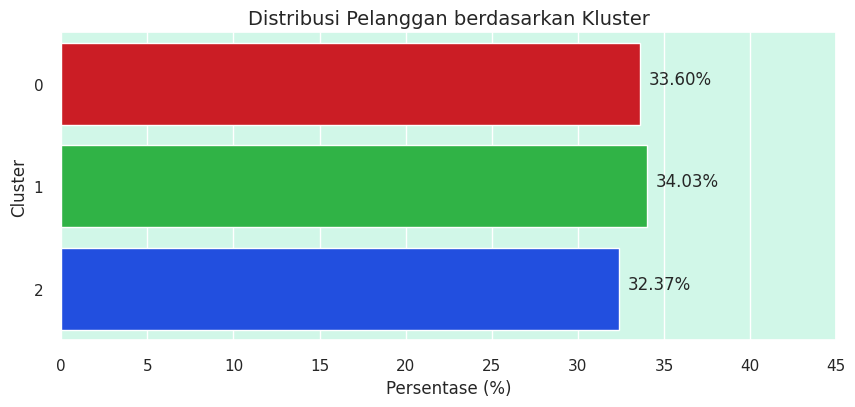

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (data_pelanggan_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribusi Pelanggan berdasarkan Kluster', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Persentase (%)')

# Show the plot
plt.savefig('/content/drive/MyDrive/Kelompok 7 Decision Making /Gambar/KMeansRes.png', transparent=True)
plt.show()

#### Evaluation Metrics

* Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
* Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.
* Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [ ]:
!pip install tabulate -q

In [ ]:
from tabulate import tabulate
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Compute number of customers
num_observations = len(data_pelanggan_pca)

# Separate the features and the cluster labels
X = data_pelanggan_pca.drop('cluster', axis=1)
clusters = data_pelanggan_pca['cluster']
# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Jumlah Observasi", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
|    Jumlah Observasi     |        3806        |
|    Silhouette Score     | 0.5863030627306197 |
| Calinski Harabasz Score | 14902.534025584771 |
|  Davies Bouldin Score   | 0.5045829283965887 |
+-------------------------+--------------------+


### Cluster Analysis

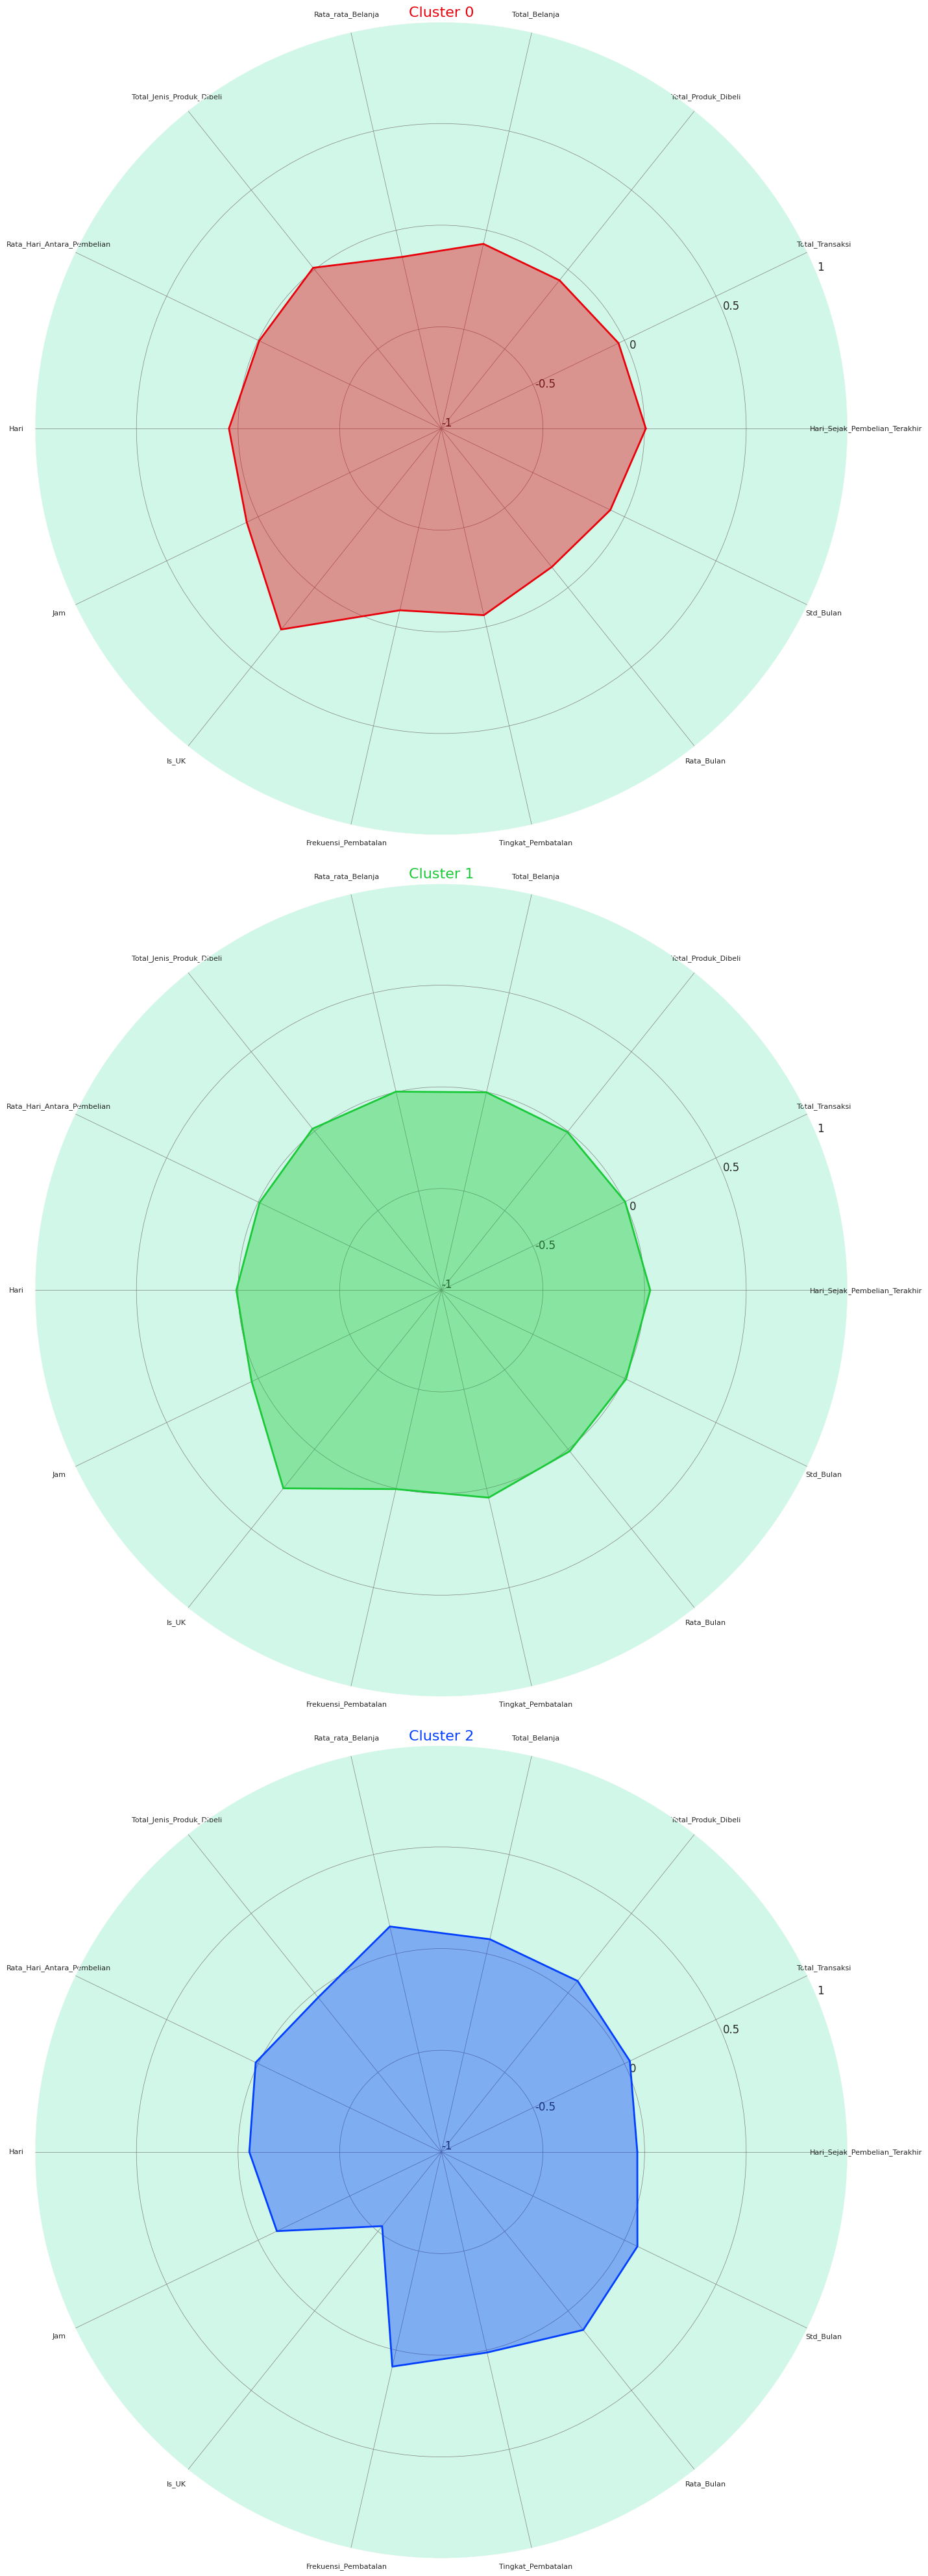

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = data_pelanggan_cleaned.set_index('Customer ID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=10, color=color, y=1.1, fontsize=8)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with a larger height
fig, ax = plt.subplots(figsize=(50, 40), subplot_kw=dict(polar=True), nrows=3, ncols=1)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Set y-tick labels for each subplot to the range -1 to 1
    ax[i].set_yticks([-1, -0.5, 0, 0.5, 1])
    ax[i].set_yticklabels([-1, -0.5, 0, 0.5, 1], fontsize=12)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1], fontsize=8)

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

    # Set the title font size
    ax[i].set_title(f'Cluster {i}', size=20, color=color, fontsize=16)

# Display the plot
plt.subplots_adjust(hspace=3)
plt.tight_layout()
plt.show()

In [ ]:
cluster_centroids

Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  Total_Produk_Dibeli  \
cluster                                                                        
0                             0.006229        -0.032181            -0.067598   
1                             0.027836         0.003624            -0.004955   
2                            -0.035726         0.029599             0.075386   

         Total_Belanja  Rata_rata_Belanja  Total_Jenis_Produk_Dibeli  \
cluster                                                                
0            -0.068591          -0.134068                   0.011145   
1            -0.001681           0.001885                   0.015904   
2             0.072974           0.137202                  -0.028287   

         Rata_Hari_Antara_Pembelian      Hari       Jam     Is_UK  \
cluster                                                             
0                         -0.005564  0.044728  0.062502  0.264147   
1                         -0.007370  0.008482  0.035362  0.246250   
2                          0.013523 -0.055351 -0.102056 -0.533066   

         Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan  Std_Bulan  
cluster                                                                   
0                   -0.083152           -0.058375   -0.128654  -0.076970  
1                    0.003298            0.046291    0.012940   0.008607  
2                    0.082858            0.011944    0.119961   0.070859

Klaster 0: 🎯: Keterlibatan sedang, pengeluaran lebih rendah, dan lebih sedikit variabilitas dalam pola pengeluaran. Kemungkinan pelanggan yang berbasis di Inggris.

* Pelanggan dalam klaster ini cenderung berbelanja lebih sedikit, dengan jumlah transaksi dan produk yang dibeli lebih rendah.
* Mereka memiliki sedikit kecenderungan untuk berbelanja selama hari kerja, seperti yang ditunjukkan oleh nilai Hari yang rendah.
* Tren belanja mereka relatif stabil tetapi di sisi yang lebih rendah, dan mereka memiliki variasi belanja bulanan yang rendah (Std_Bulan rendah).
* Pelanggan ini tidak banyak melakukan pembatalan, menunjukkan frekuensi dan tingkat pembatalan yang rendah.
* Nilai transaksi rata-rata berada di sisi bawah, menunjukkan bahwa ketika mereka berbelanja, mereka cenderung membelanjakan lebih sedikit per transaksi.
* Mereka memiliki kecenderungan yang sedikit lebih tinggi untuk berasal dari Inggris

Klaster 1: 🎯: Keterlibatan dan pengeluaran sedang hingga tinggi, dengan fokus pada belanja yang lebih sering dan bervariasi.

* Pelanggan ini memiliki nilai yang sedikit di atas rata-rata di sebagian besar fitur, yang menunjukkan tren umum ke arah keterlibatan dan pengeluaran yang lebih tinggi.
* Mereka berbelanja lebih sering dengan rentang waktu yang sedikit lebih pendek di antara pembelian.
* Mereka cenderung berasal dari Inggris.
* Mereka menunjukkan variabilitas yang sedikit lebih tinggi dalam pola belanja bulanan.

Cluster 2: 🎯 Profil: Keterlibatan tinggi, pengeluaran lebih tinggi, dan transaksi yang lebih jarang tetapi lebih besar. Menunjukkan variabilitas yang lebih tinggi dalam pola belanja bulanan.

* Pelanggan dalam klaster ini adalah pembelanja yang tinggi dengan total pembelanjaan yang sangat tinggi, dan mereka membeli berbagai macam produk yang unik.
* Mereka lebih jarang berbelanja tetapi menghabiskan lebih banyak uang untuk setiap transaksi.
* Mereka memiliki frekuensi dan tingkat pembatalan yang tinggi.
* Pelanggan ini memiliki waktu rata-rata yang sangat rendah di antara pembelian, dan mereka cenderung berbelanja di siang hari (nilai Jam moderat).
* Pengeluaran bulanan mereka menunjukkan variabilitas yang tinggi, mengindikasikan bahwa pola pengeluaran mereka mungkin kurang dapat diprediksi dibandingkan dengan klaster lainnya.

## Clustering using K-Means++

In [ ]:
if 'cluster' in data_pelanggan_pca.columns:
    data_pelanggan_pca.drop(columns='cluster', inplace=True)

data_pelanggan_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  3022.705325 -2.255368  2.327722  0.774400 -0.294429  0.100825
1  3021.705502  0.480480 -3.491554 -2.178037 -0.191958  0.764534
2  3020.705456 -1.829778  2.338854  0.044975 -0.668220  0.642826
3  3019.705923  1.921583 -0.281616 -2.509720  1.517922 -1.266186
4  3017.705490 -1.538528  2.342569 -0.311380 -0.701395  1.289384

### Determining the Optimal Number of Clusters

#### Elbow Method

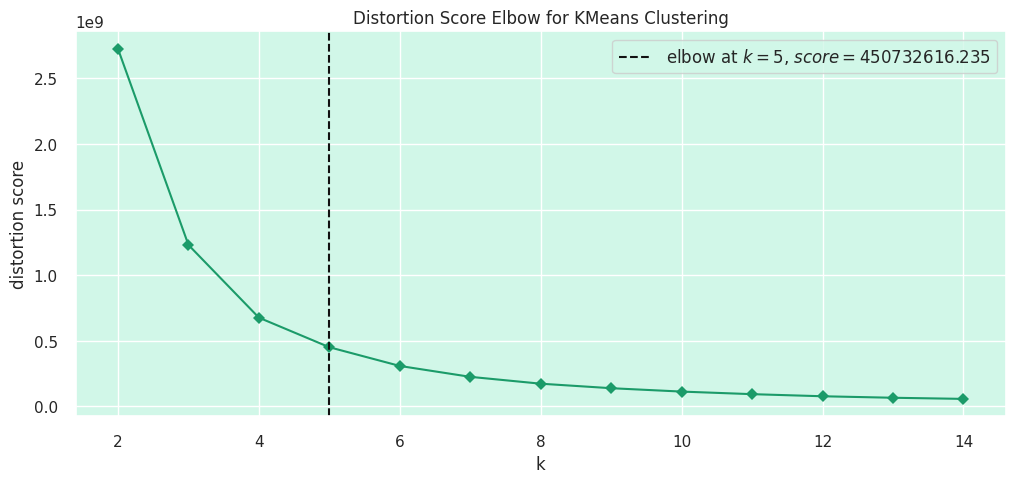

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#d1f7e8'})

# Set the color palette for the plot
sns.set_palette(['#1b9b69'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(data_pelanggan_pca)

# Finalize and render the figure
visualizer.show();

#### Silhouette Method

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from matplotlib.gridspec import GridSpec

def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

<ipython-input-115-c2c46096a3aa>:66: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



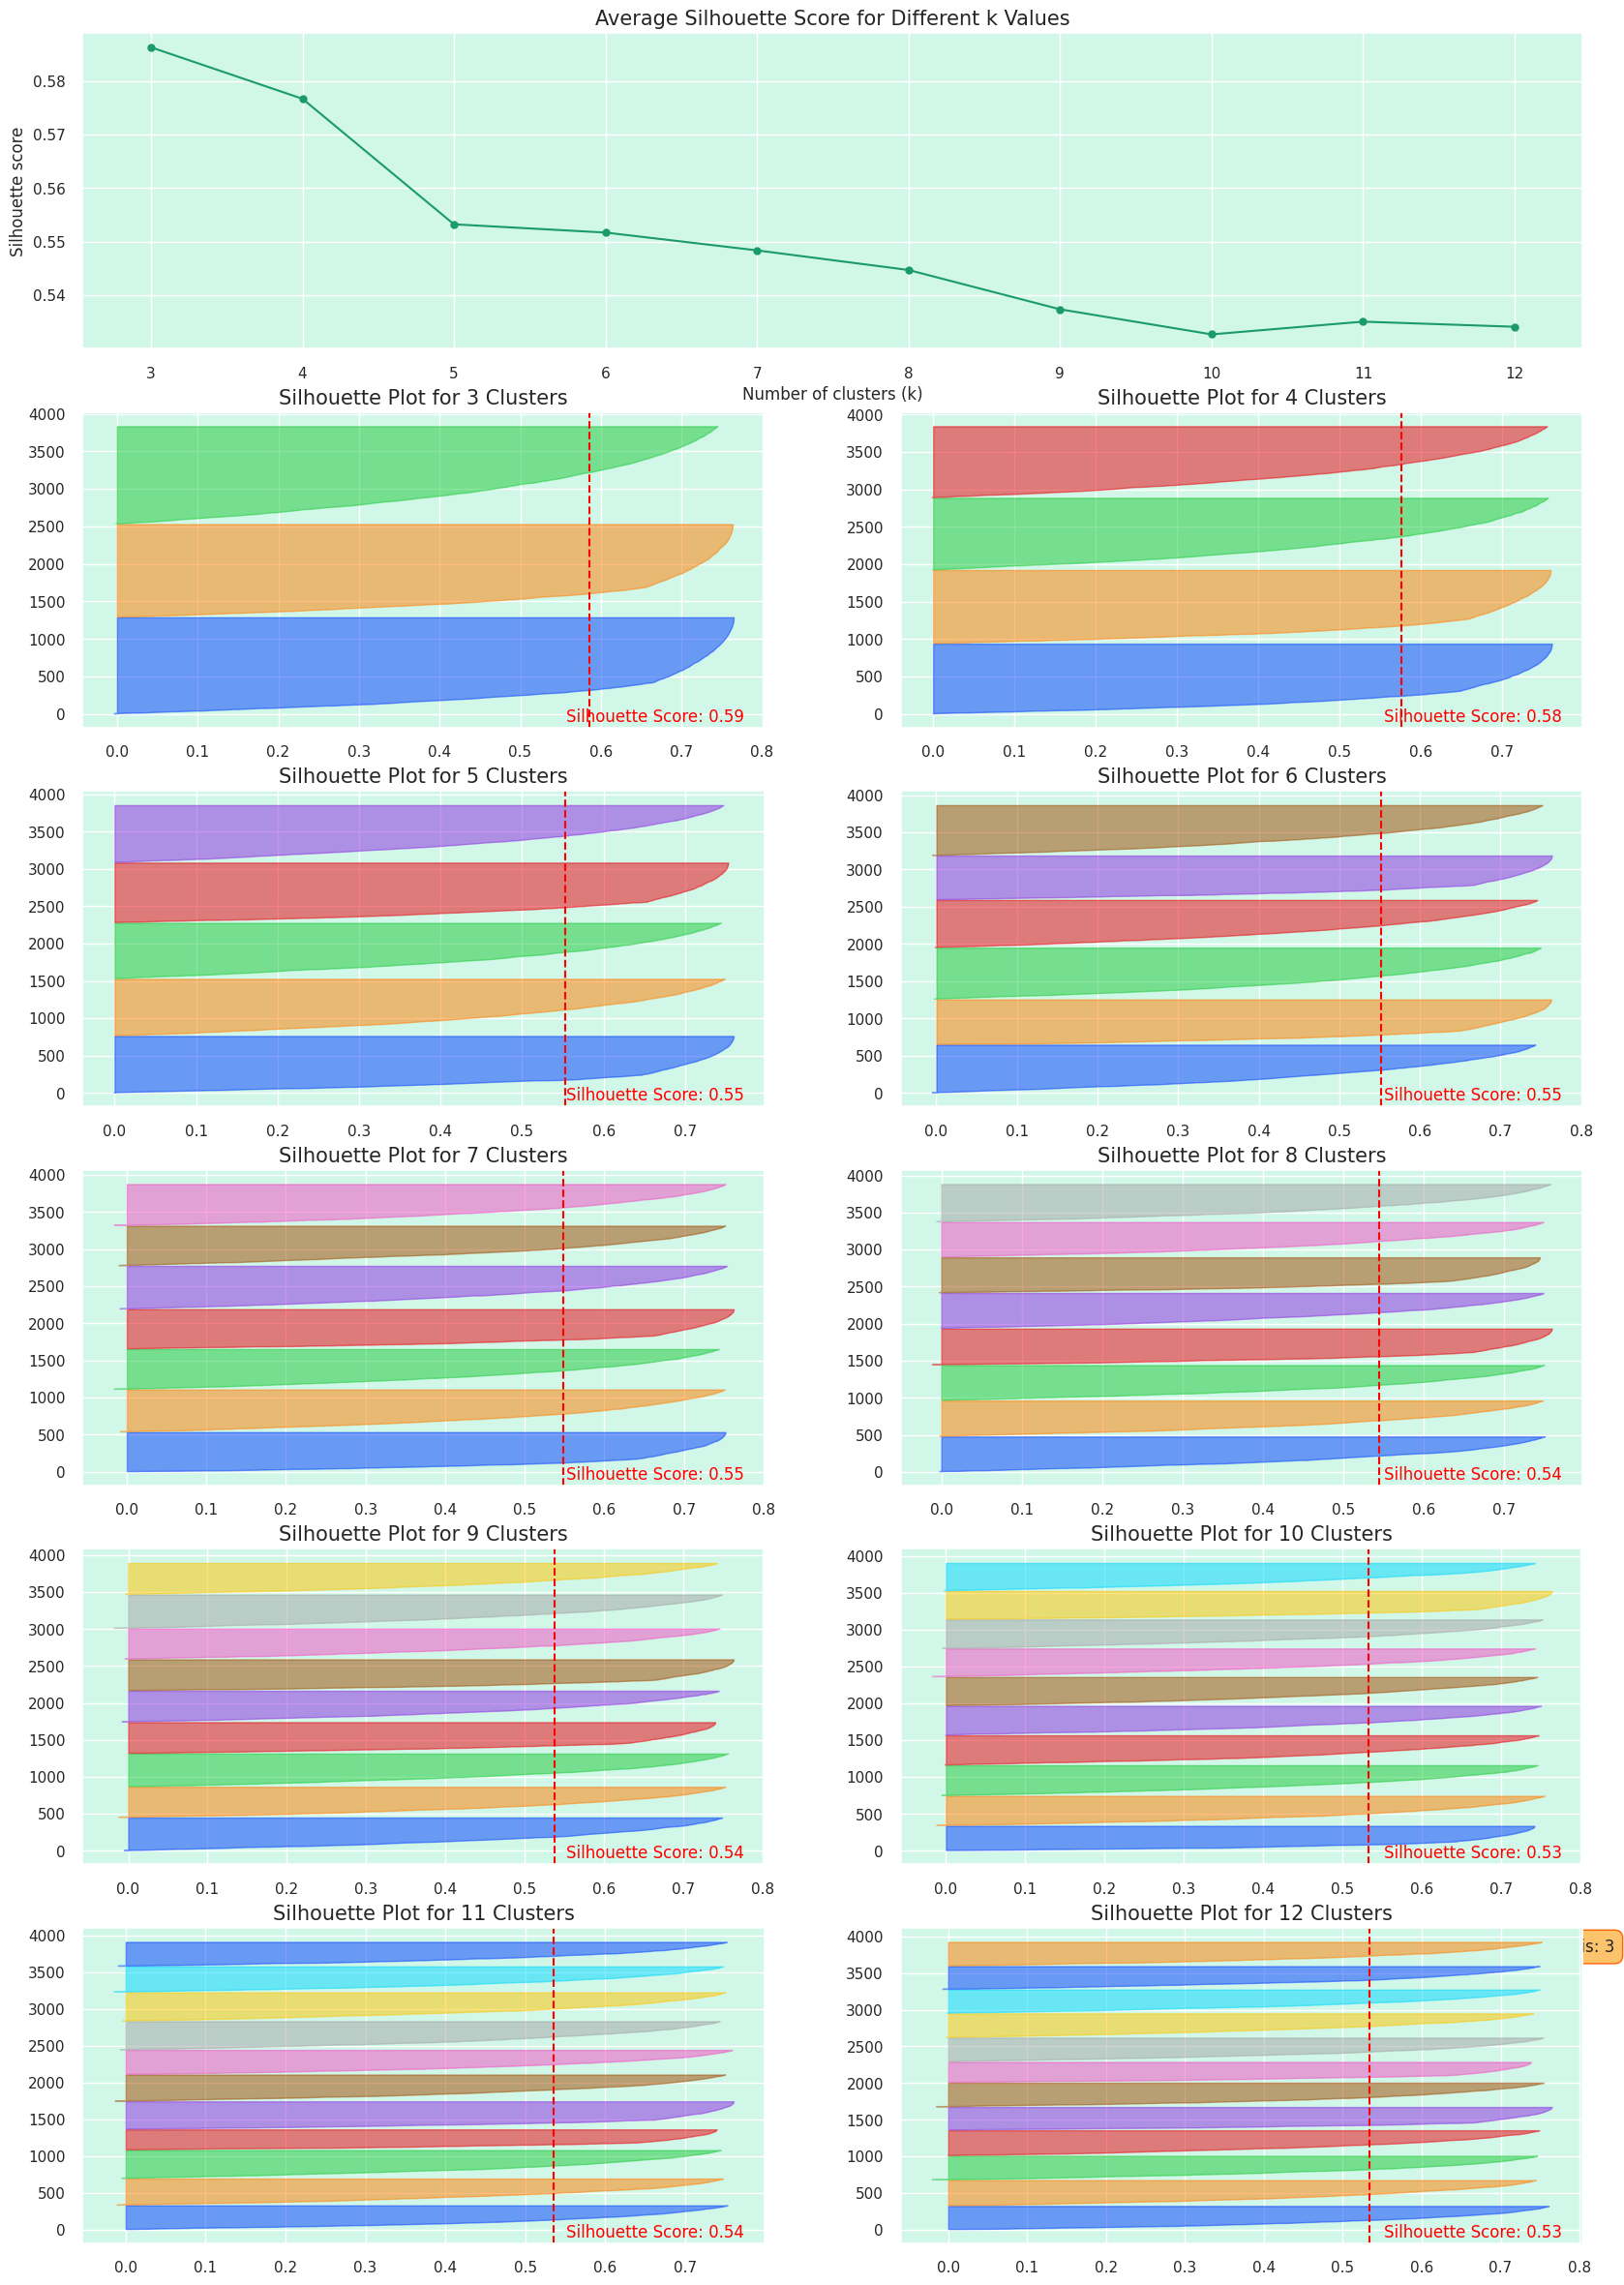

In [ ]:
silhouette_analysis(data_pelanggan_pca, 3, 12, figsize=(20, 50))

Kesimpulan : **K = 3**

### Clustering

In [ ]:
from collections import Counter

# Apply KMeans clustering using the optimal k
start_time = time.time()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pelanggan_pca)
execution_time = time.time() - start_time

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
data_pelanggan_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
data_pelanggan_pca['cluster'] = new_labels

print("Execution Time:", execution_time, "seconds")

Execution Time: 0.6335735321044922 seconds


### Evaluation

#### 3D Visualization of Top Principal Components

In [ ]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [ ]:
import plotly.graph_objects as go

# Create separate data frames for each cluster
cluster_0 = data_pelanggan_pca[data_pelanggan_pca['cluster'] == 0]
cluster_1 = data_pelanggan_pca[data_pelanggan_pca['cluster'] == 1]
cluster_2 = data_pelanggan_pca[data_pelanggan_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

#### Cluster Distribution Visualization¶

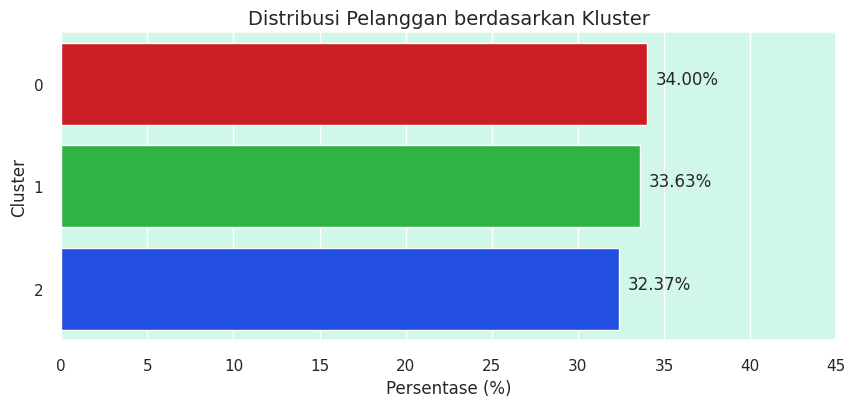

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (data_pelanggan_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribusi Pelanggan berdasarkan Kluster', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Persentase (%)')

# Show the plot
plt.savefig('/content/drive/MyDrive/Kelompok 7 Decision Making /Gambar/KMeansPlusRes.png', transparent=True)
plt.show()

#### Evaluation Metrics

* Skor Siluet: Ukuran untuk mengevaluasi jarak pemisahan antara cluster. Nilai yang lebih tinggi menunjukkan pemisahan klaster yang lebih baik. Nilai ini berkisar antara -1 hingga 1.
* Skor Calinski Harabasz: Skor ini digunakan untuk mengevaluasi penyebaran antara dan di dalam cluster. Nilai yang lebih tinggi menunjukkan cluster yang lebih baik.
* Skor Davies Bouldin: Skor ini menilai kemiripan rata-rata antara setiap klaster dan klaster yang paling mirip. Nilai yang lebih rendah menunjukkan pemisahan klaster yang lebih baik.

In [ ]:
from tabulate import tabulate
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Compute number of customers
num_observations = len(data_pelanggan_pca)

# Separate the features and the cluster labels
X = data_pelanggan_pca.drop('cluster', axis=1)
clusters = data_pelanggan_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Jumlah Observasi", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
|    Jumlah Observasi     |        3806        |
|    Silhouette Score     | 0.5862851022822922 |
| Calinski Harabasz Score | 14902.428884446932 |
|  Davies Bouldin Score   | 0.5045914083378827 |
+-------------------------+--------------------+


### Cluster Analysis

In [ ]:
df_customer.head()

Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
Customer ID                                                   
12346.0                                164                2   
12347.0                                  2                2   
12348.0                                 73                1   
12349.0                                 42                3   
12351.0                                 10                1   

             Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
Customer ID                                                          
12346.0                       24         169.36              84.68   
12347.0                      828        1323.32             661.66   
12348.0                      372         221.16             221.16   
12349.0                      986        2196.99             732.33   
12351.0                      261         300.93             300.93   

             Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari  Jam  \
Customer ID                                                                     
12346.0                             24                    5.130435     0   13   
12347.0                             70                    0.528571     6   14   
12348.0                             19                         0.0     0   14   
12349.0                             91                    3.144231     3    8   
12351.0                             21                         0.0     0   15   

             Is_UK  Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan  \
Customer ID                                                                
12346.0          1                     0                 0.0       84.68   
12347.0          0                     0                 0.0      661.66   
12348.0          0                     0                 0.0      221.16   
12349.0          0                     1            0.333333      732.33   
12351.0          0                     0                 0.0      300.93   

              Std_Bulan  cluster  
Customer ID                       
12346.0       81.501128        2  
12347.0       70.894526        2  
12348.0             0.0        2  
12349.0      656.479014        2  
12351.0             0.0        2

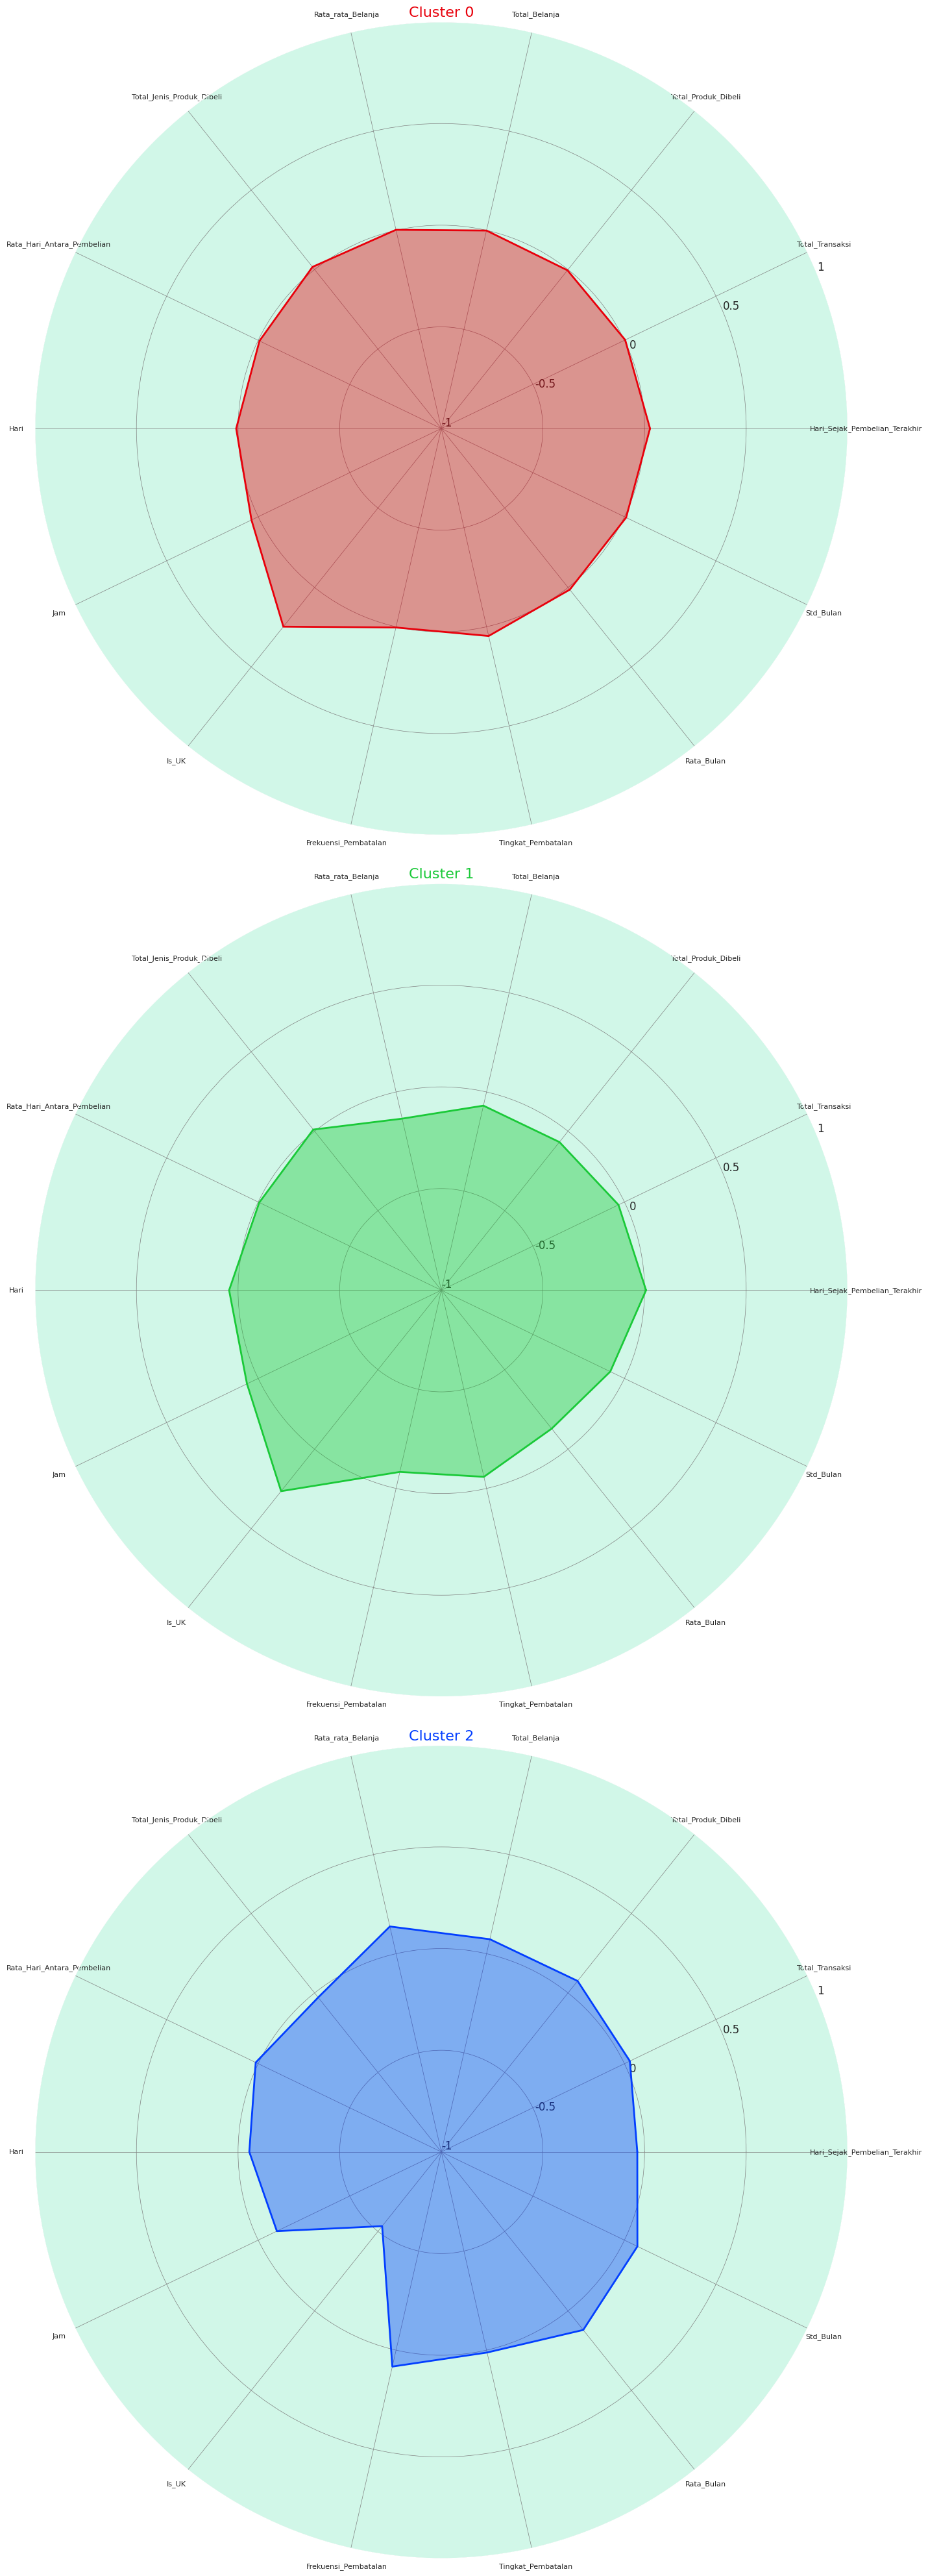

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = data_pelanggan_cleaned.set_index('Customer ID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=10, color=color, y=1.1, fontsize=8)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with a larger height
fig, ax = plt.subplots(figsize=(50, 40), subplot_kw=dict(polar=True), nrows=3, ncols=1)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Set y-tick labels for each subplot to the range -1 to 1
    ax[i].set_yticks([-1, -0.5, 0, 0.5, 1])
    ax[i].set_yticklabels([-1, -0.5, 0, 0.5, 1], fontsize=12)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1], fontsize=8)

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

    # Set the title font size
    ax[i].set_title(f'Cluster {i}', size=20, color=color, fontsize=16)

# Display the plot
plt.subplots_adjust(hspace=3)
plt.tight_layout()
plt.show()

**Klaster 0**: Keterlibatan dan pembelanjaan sedang hingga tinggi, dengan fokus pada pembelanjaan yang lebih sering dan bervariasi.
* Pelanggan ini memiliki nilai sedikit di atas rata-rata di sebagian besar fitur, yang menunjukkan tren umum ke arah keterlibatan dan pengeluaran yang lebih tinggi.
* Mereka berbelanja lebih sering dengan rentang waktu yang sedikit lebih pendek di antara pembelian.
* Mereka cenderung berasal dari Inggris.
* Mereka menunjukkan variabilitas yang sedikit lebih tinggi dalam pola belanja bulanan.

**Klaster 1**:  Keterlibatan dan pengeluaran yang lebih rendah, dengan belanja yang lebih jarang dan kurang bervariasi.
* Pelanggan ini memiliki nilai di bawah rata-rata di sebagian besar fitur, yang mengindikasikan keterlibatan dan pengeluaran yang lebih rendah.
* Mereka lebih jarang berbelanja dengan rentang waktu yang sedikit lebih lama di antara pembelian.
* Mereka cenderung berasal dari Inggris.
* Mereka menunjukkan variabilitas yang lebih rendah dalam pola belanja bulanan.

**Klaster 2**:  Keterlibatan dan pengeluaran yang tinggi, dengan transaksi yang lebih jarang tetapi lebih besar dan variabilitas yang lebih tinggi dalam pola pengeluaran bulanan.
* Nasabah ini memiliki nilai yang lebih tinggi di sebagian besar fitur, yang mengindikasikan tingkat keterlibatan dan pengeluaran yang lebih tinggi.
* Mereka lebih jarang berbelanja namun membelanjakan lebih banyak untuk setiap transaksi.
* Mereka cenderung tidak berasal dari Inggris.
* Mereka menunjukkan variabilitas yang lebih tinggi dalam pola belanja bulanan.

## Clustering Using DenMune

In [ ]:
!pip install denmune -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 22.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
from denmune import DenMune

In [ ]:
# Delete the cluster column from pca data
data_pelanggan_pca_initial = data_pelanggan_pca.drop(columns = 'cluster')
data_pelanggan_pca_initial.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  3022.705325 -2.255368  2.327722  0.774400 -0.294429  0.100825
1  3021.705502  0.480480 -3.491554 -2.178037 -0.191958  0.764534
2  3020.705456 -1.829778  2.338854  0.044975 -0.668220  0.642826
3  3019.705923  1.921583 -0.281616 -2.509720  1.517922 -1.266186
4  3017.705490 -1.538528  2.342569 -0.311380 -0.701395  1.289384

In [ ]:
data_pelanggan_scaled.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                       0.835966        -0.438042   
1     12347.0                      -0.882890        -0.438042   
2     12348.0                      -0.129564        -0.582075   
3     12349.0                      -0.458481        -0.294008   
4     12351.0                      -0.798008        -0.582075   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0            -0.600730      -0.537908          -1.047724   
1             0.026633      -0.037174           2.290348   
2            -0.329185      -0.515430          -0.258130   
3             0.149921       0.341935           2.699203   
4            -0.415799      -0.480816           0.203373   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari       Jam  \
0                  -0.520765                    0.228689     0  0.150301   
1                   0.085704                   -0.303516     6  0.590676   
2                  -0.586685                   -0.364645     0  0.590676   
3                   0.362569                   -0.001015     3 -2.051572   
4                  -0.560317                   -0.364645     0  1.031051   

   Is_UK  Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan  Std_Bulan  
0      1             -0.482834           -0.358638   -1.029984  -0.287261  
1      0             -0.482834           -0.358638    1.218095  -0.337137  
2      0             -0.482834           -0.358638   -0.498219  -0.670507  
3      0              0.065069           -0.066059    1.493446   2.416480  
4      0             -0.482834           -0.358638   -0.187412  -0.670507

Plotting train data


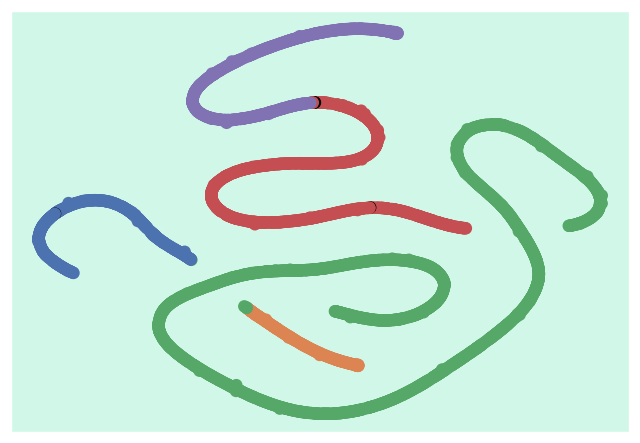

Validating train data
├── exec_time
│   ├── DenMune: 9.315
│   ├── NGT: 0.355
│   └── t_SNE: 63.462
├── n_clusters
│   ├── actual: 0
│   └── detected: 5
└── n_points
    ├── dim: 15
    ├── noise
    │   ├── type-1: 6
    │   └── type-2: 0
    ├── plot_size: 3806
    ├── size: 3806
    ├── strong: 2118
    └── weak
        ├── all: 1688
        ├── failed to merge: 0
        └── succeeded to merge: 1688

Execution Time: 72.98794937133789 seconds


In [ ]:
knn = 130 # k-nearest neighbor, the only parameter required by the algorithm
start_time = time.time()
dm = DenMune(train_data=data_pelanggan_scaled,
             k_nearest=knn,
             rgn_tsne=False)
execution_time = time.time() - start_time

labels, validity = dm.fit_predict(show_noise=True, show_analyzer=True)
print("Execution Time:", execution_time, "seconds")

In [ ]:
data_pelanggan_denmune80 = data_pelanggan_scaled.copy()
data_pelanggan_denmune80['cluster'] = labels['train']
data_pelanggan_denmune80['cluster'].unique()

array([2096, 2099, 1999,   -1, 2114, 2117])

In [ ]:
data_pelanggan_denmune80['cluster'] = data_pelanggan_denmune80['cluster'].replace({2096: 0, 2099: 1, 1999: 2, 2114: 3, 2117: 4})
data_pelanggan_denmune80.head()

Customer ID  Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  \
0     12346.0                       0.835966        -0.438042   
1     12347.0                      -0.882890        -0.438042   
2     12348.0                      -0.129564        -0.582075   
3     12349.0                      -0.458481        -0.294008   
4     12351.0                      -0.798008        -0.582075   

   Total_Produk_Dibeli  Total_Belanja  Rata_rata_Belanja  \
0            -0.600730      -0.537908          -1.047724   
1             0.026633      -0.037174           2.290348   
2            -0.329185      -0.515430          -0.258130   
3             0.149921       0.341935           2.699203   
4            -0.415799      -0.480816           0.203373   

   Total_Jenis_Produk_Dibeli  Rata_Hari_Antara_Pembelian  Hari       Jam  \
0                  -0.520765                    0.228689     0  0.150301   
1                   0.085704                   -0.303516     6  0.590676   
2                  -0.586685                   -0.364645     0  0.590676   
3                   0.362569                   -0.001015     3 -2.051572   
4                  -0.560317                   -0.364645     0  1.031051   

   Is_UK  Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan  Std_Bulan  \
0      1             -0.482834           -0.358638   -1.029984  -0.287261   
1      0             -0.482834           -0.358638    1.218095  -0.337137   
2      0             -0.482834           -0.358638   -0.498219  -0.670507   
3      0              0.065069           -0.066059    1.493446   2.416480   
4      0             -0.482834           -0.358638   -0.187412  -0.670507   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
data_pelanggan_denmune80 = data_pelanggan_denmune80[data_pelanggan_denmune80['cluster'] != -1]

### Cluster Distribution

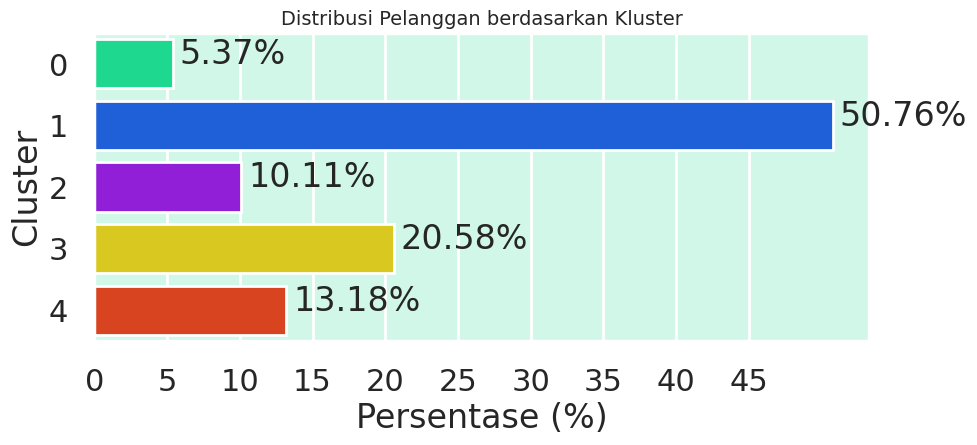

In [ ]:
colors = ['#00f796', '#0056f7', '#9a00f7', '#f7e100', '#f73100']

# Calculate the percentage of customers in each cluster
cluster_percentage = (data_pelanggan_denmune80['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribusi Pelanggan berdasarkan Kluster', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Persentase (%)')

# Show the plot
plt.savefig('/content/drive/MyDrive/Kelompok 7 Decision Making /Gambar/Denmune.png', transparent=True)
plt.show()

### Evaluate

In [ ]:
# Compute number of customers
num_observations = len(data_pelanggan_denmune80)

# Separate the features and the cluster labels
X = data_pelanggan_denmune80.drop('cluster', axis=1)
clusters = data_pelanggan_denmune80['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Jumlah Observasi", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|    Jumlah Observasi     |        3800         |
|    Silhouette Score     | 0.34240676919067037 |
| Calinski Harabasz Score |  5628.030525283073  |
|  Davies Bouldin Score   | 0.5033222031211376  |
+-------------------------+---------------------+


### Cluster Analysis

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = data_pelanggan_cleaned.set_index('Customer ID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)

# Assuming df_customer_standardized and data_pelanggan_denmune80 are your DataFrames
common_customer_ids = df_customer_standardized.index.intersection(data_pelanggan_denmune80['Customer ID'])
df_customer_standardized_filtered = df_customer_standardized.loc[common_customer_ids]

df_customer_standardized_filtered['cluster'] = data_pelanggan_denmune80['cluster'].tolist()

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized_filtered.groupby('cluster').mean()

In [ ]:
cluster_centroids

Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  Total_Produk_Dibeli  \
cluster                                                                        
0                            -0.078385        -0.001705             0.245867   
1                            -0.000080         0.019669             0.014018   
2                             0.014917         0.016564             0.027941   
3                            -0.013109        -0.051620            -0.069900   
4                             0.037764        -0.010829            -0.074250   

         Total_Belanja  Rata_rata_Belanja  Total_Jenis_Produk_Dibeli  \
cluster                                                                
0             0.192817           0.554411                  -0.047042   
1             0.023030           0.013453                   0.012374   
2             0.012827           0.078274                  -0.068729   
3            -0.069164          -0.126575                   0.028853   
4            -0.075785          -0.142467                  -0.017638   

         Rata_Hari_Antara_Pembelian      Hari       Jam     Is_UK  \
cluster                                                             
0                         -0.055200 -0.160050 -0.333247 -3.542504   
1                          0.002258 -0.007078  0.005336  0.239981   
2                          0.040240 -0.021269 -0.058418 -0.190285   
3                          0.002298  0.050298  0.060199  0.261385   
4                         -0.018711  0.029970  0.063281  0.253004   

         Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan  Std_Bulan  
cluster                                                                   
0                    0.177872           -0.094892    0.421448   0.336937  
1                    0.028428            0.037435    0.031627   0.022589  
2                    0.043666            0.056882    0.037713  -0.036832  
3                   -0.096780           -0.066341   -0.123190  -0.069376  
4                   -0.062884           -0.043960   -0.132806  -0.087785

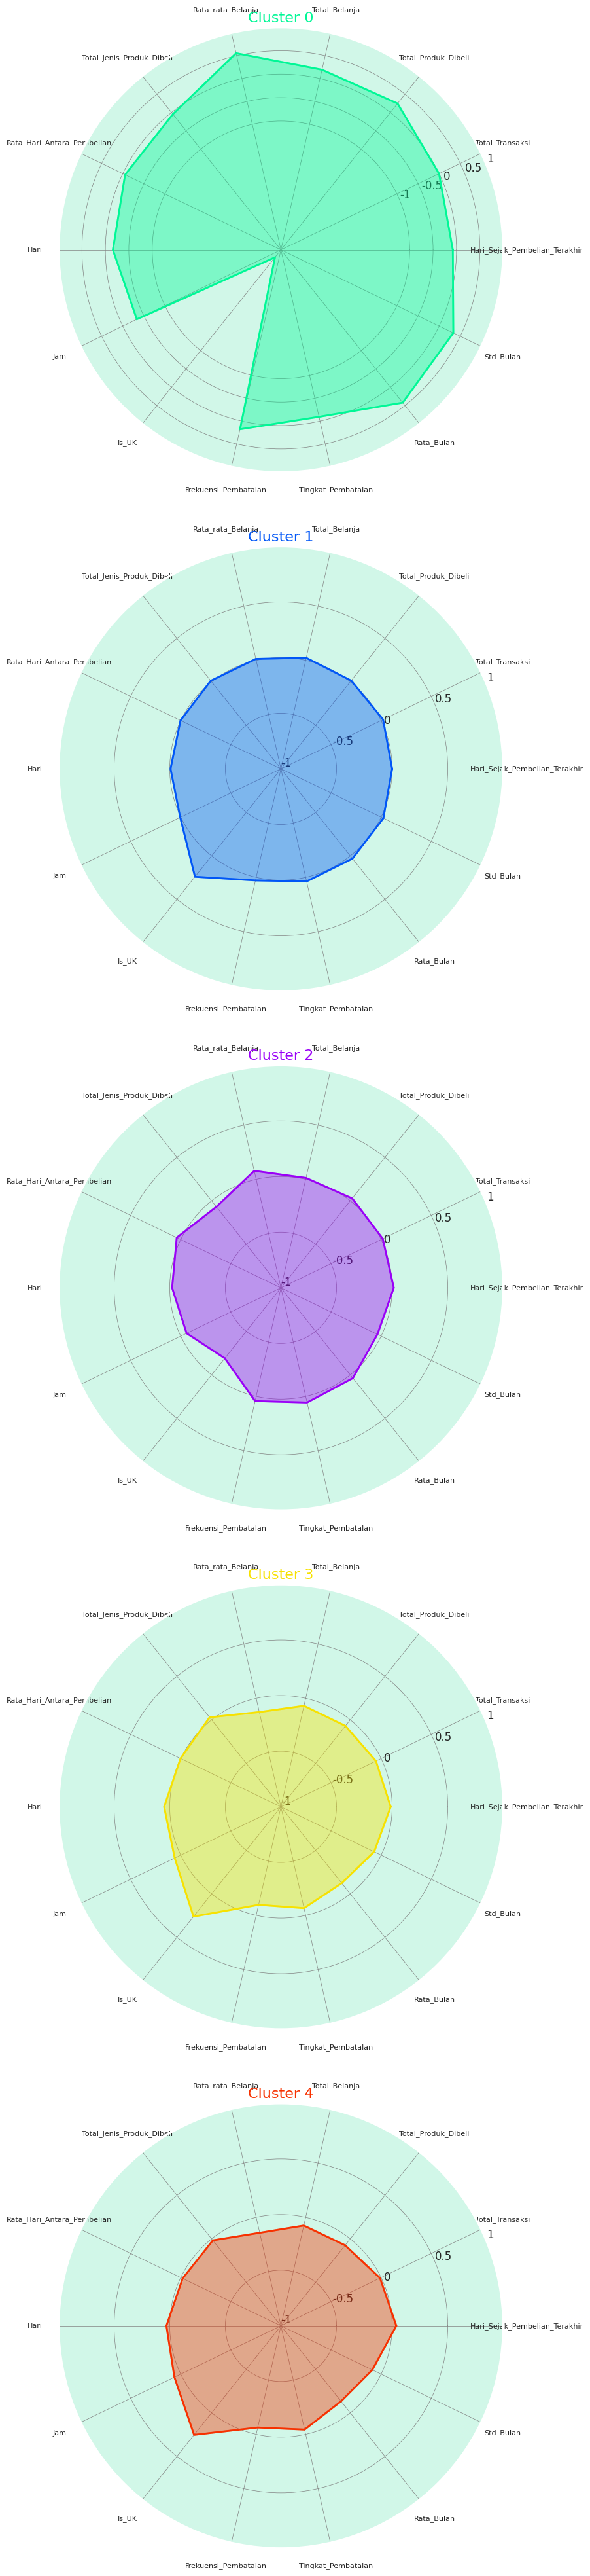

In [ ]:
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with a larger height
fig, ax = plt.subplots(figsize=(50, 40), subplot_kw=dict(polar=True), nrows=5, ncols=1)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Set y-tick labels for each subplot to the range -1 to 1
    ax[i].set_yticks([-1, -0.5, 0, 0.5, 1])
    ax[i].set_yticklabels([-1, -0.5, 0, 0.5, 1], fontsize=12)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1], fontsize=8)

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

    # Set the title font size
    ax[i].set_title(f'Cluster {i}', size=20, color=color, fontsize=16)

# Display the plot
plt.subplots_adjust(hspace=3)
plt.tight_layout()
plt.show()

**Klaster 0:** Pelanggan bernilai tinggi yang melakukan transaksi baru-baru ini, sering, dan beragam dengan pembelanjaan yang relatif tinggi. Beberapa ketidakpuasan yang ditunjukkan oleh frekuensi pembatalan.

* Nilai negatif yang tinggi untuk Hari_Sejak_Pembelian_Terakhir.
* Nilai yang tinggi untuk Total_Transaksi dan Total_Produk_Dibeli (transaksi yang sering dan beragam).
* Tingginya nilai Total_Belanja dan Rata_rata_Belanja per transaksi.
* Frekuensi pembatalan yang relatif tinggi (Frekuensi_Pembatalan)


**Klaster 1**: Mewakili perilaku rata-rata atau tipikal dengan nilai moderat di seluruh fitur.
* Nilai mendekati nol untuk sebagian besar fitur, menunjukkan perilaku rata-rata atau tipikal.
* Nilai moderat untuk fitur-fitur yang berhubungan dengan transaksi dan pembelanjaan.

Cluster 2: Pelanggan dengan hari sejak pembelian sedikit lebih tua, aktivitas transaksi sedang, dan pengeluaran rata-rata.

Nilai positif untuk Hari_Sejak_Pembelian_Terakhir (sedikit lebih tua sejak pembelian).
Nilai sedang untuk fitur-fitur terkait transaksi. Tingkat pengeluaran rata-rata.

Cluster 3: Pelanggan dengan nilai yang lebih rendah dengan pembelian yang lebih lama, transaksi yang lebih sedikit, dan pengeluaran yang lebih rendah. Pelanggan yang puas dengan frekuensi pembatalan yang rendah.

Nilai negatif untuk Hari_Sejak_Pembelian_Terakhir (pembelian yang lebih lama).
Nilai yang lebih rendah untuk fitur dan pengeluaran terkait transaksi.
Frekuensi dan tingkat pembatalan yang rendah.

Cluster 4: Pelanggan dengan nilai sedang dengan pembelian yang lebih lama, aktivitas transaksi dan pengeluaran yang sedang.

Nilai positif untuk Hari_Sejak_Pembelian_Terakhir (pembelian lama).
Nilai rendah hingga sedang untuk fitur-fitur yang berhubungan dengan transaksi. Tingkat pengeluaran sedang.

## Clustering with K-Medoids via BanditPAM

In [ ]:
!pip install banditpam -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.3 MB/s eta 0:00:00


In [ ]:
from banditpam import KMedoids

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMedoids(n_medoids=k, algorithm="BanditPAM")
        km.fit(df, 'L2')
        labels = km.labels
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot with adjusted coordinates
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(stop_k, max(silhouette_scores), optimal_k_text, fontsize=12, verticalalignment='top',
             horizontalalignment='right', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

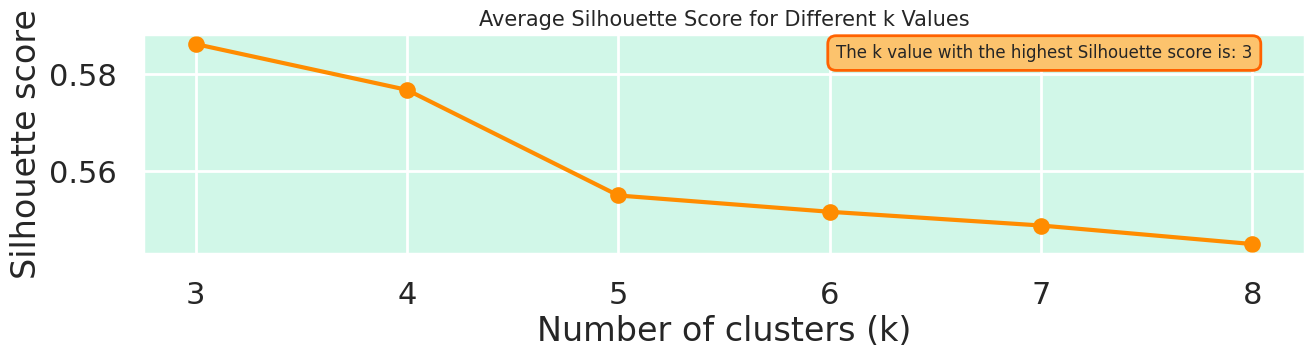

In [ ]:
silhouette_analysis(data_pelanggan_pca_initial, 3, 8, figsize=(15, 20))

In [ ]:
import time

start_time = time.time()
kmed = KMedoids(n_medoids=3, algorithm="BanditPAM")
kmed.fit(data_pelanggan_pca_initial, 'L2')
execution_time = time.time() - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 22.701653718948364 seconds


In [ ]:
print(kmed.average_loss)
print(kmed.labels)

491.8368225097656
[1 1 1 ... 2 2 2]


In [ ]:
data_pelanggan_pca_kmedoid = data_pelanggan_pca_initial.copy()
data_pelanggan_pca_kmedoid['cluster'] = kmed.labels
data_pelanggan_pca_kmedoid['cluster'].unique()

array([1, 0, 2], dtype=uint64)

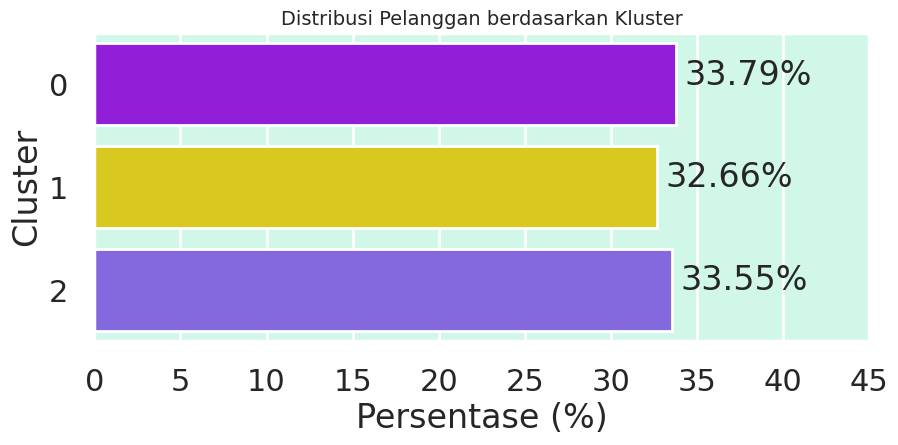

In [ ]:
colors = ['#9a00f7', '#f7e100', '#7a54f2']

# Calculate the percentage of customers in each cluster
cluster_percentage = (data_pelanggan_pca_kmedoid['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribusi Pelanggan berdasarkan Kluster', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Persentase (%)')

# Show the plot
plt.savefig('/content/drive/MyDrive/Kelompok 7 Decision Making /Gambar/KMedoidsRes.png', transparent=True)
plt.show()

### Evaluate

In [ ]:
# Compute number of customers
num_observations = len(data_pelanggan_pca_kmedoid)

# Separate the features and the cluster labels
X = data_pelanggan_pca_kmedoid.drop('cluster', axis=1)
clusters = data_pelanggan_pca_kmedoid['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Jumlah Observasi", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
|    Jumlah Observasi     |        3806        |
|    Silhouette Score     | 0.5860995943466494 |
| Calinski Harabasz Score | 14900.359973792856 |
|  Davies Bouldin Score   | 0.5047019265801244 |
+-------------------------+--------------------+


### Cluster Analysis

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = data_pelanggan_cleaned.set_index('Customer ID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = data_pelanggan_pca_kmedoid['cluster'].tolist()

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

In [ ]:
cluster_centroids

Hari_Sejak_Pembelian_Terakhir  Total_Transaksi  Total_Produk_Dibeli  \
cluster                                                                        
0                             0.023080         0.008283            -0.000982   
1                            -0.031093         0.025924             0.071241   
2                             0.007023        -0.033575            -0.068356   

         Total_Belanja  Rata_rata_Belanja  Total_Jenis_Produk_Dibeli  \
cluster                                                                
0             0.002007           0.000950                   0.018276   
1             0.069104           0.136381                  -0.029389   
2            -0.069286          -0.133707                   0.010202   

         Rata_Hari_Antara_Pembelian      Hari       Jam     Is_UK  \
cluster                                                             
0                         -0.006314  0.011627  0.030791  0.246039   
1                          0.012067 -0.056488 -0.097697 -0.525903   
2                         -0.005387  0.043275  0.064089  0.264127   

         Frekuensi_Pembatalan  Tingkat_Pembatalan  Rata_Bulan  Std_Bulan  
cluster                                                                   
0                    0.005848            0.048291    0.014564   0.011631  
1                    0.080056            0.009951    0.117381   0.067584  
2                   -0.083813           -0.058318   -0.128923  -0.077498

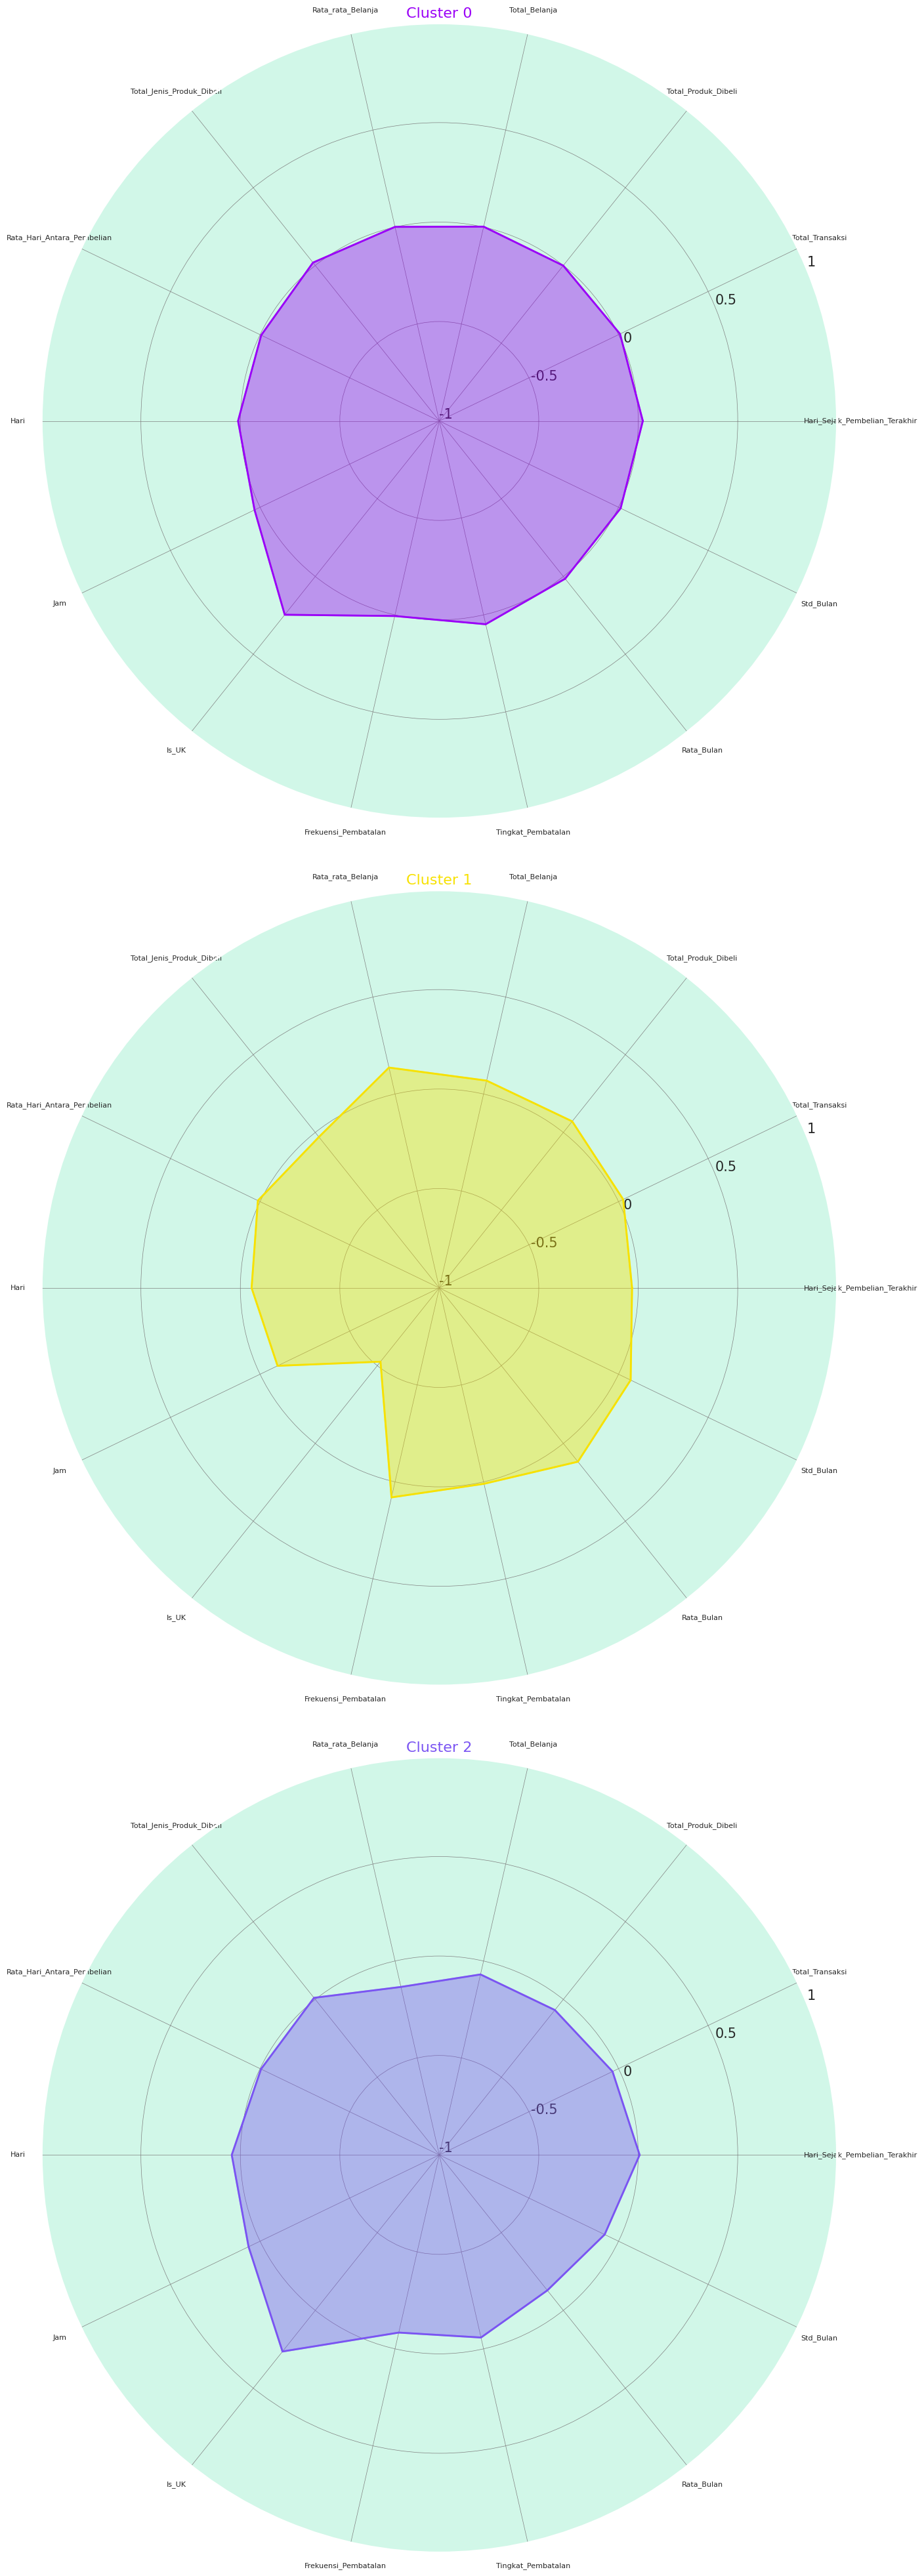

In [ ]:
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with a larger height
fig, ax = plt.subplots(figsize=(50, 40), subplot_kw=dict(polar=True), nrows=3, ncols=1)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Set y-tick labels for each subplot to the range -1 to 1
    ax[i].set_yticks([-1, -0.5, 0, 0.5, 1])
    ax[i].set_yticklabels([-1, -0.5, 0, 0.5, 1], fontsize=15)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1], fontsize=8)

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

    # Set the title font size
    ax[i].set_title(f'Cluster {i}', size=20, color=color, fontsize=16)

# Display the plot
plt.subplots_adjust(hspace=3)
plt.tight_layout()
plt.show()

**Cluster 0: Pelanggan Beraktivitas Tinggi dan Setia**

Pelanggan dalam Cluster 0 memiliki karakteristik yang menunjukkan tingkat aktivitas yang tinggi dan kesetiaan terhadap bisnis. Mereka baru-baru ini melakukan pembelian dengan frekuensi yang lebih tinggi, ditandai dengan jumlah transaksi, produk yang dibeli, dan total pengeluaran yang sedikit di atas rata-rata. Pelanggan ini cenderung berbelanja lebih sering, dengan jeda waktu antar pembelian yang sedikit lebih pendek. Selain itu, sebagian besar dari mereka berbasis di Inggris. Meskipun terdapat tingkat pembatalan yang sedikit lebih tinggi, pola pengeluaran bulanan mereka tetap konsisten.

**Cluster 1: Pelanggan Berbelanja Intensif tapi Jarang**

Cluster 1 mencakup pelanggan yang aktif berbelanja dengan karakteristik transaksi yang tinggi. Meskipun mereka berbelanja lebih jarang, setiap transaksi dilakukan dengan nilai yang lebih tinggi, tercermin dalam jumlah total transaksi, produk yang dibeli, dan total pengeluaran yang di atas rata-rata. Meskipun terdapat tingkat pembatalan yang lebih tinggi, pola pengeluaran bulanan mereka tetap tinggi.

**Cluster 2: Pelanggan Tidak Aktif**

Pelanggan dalam cluster ini cenderung tidak aktif, dengan frekuensi pembelian yang sangat rendah. Mereka melakukan sedikit transaksi, membeli sedikit produk, dan menghabiskan jumlah uang yang terbatas. Pelanggan dalam cluster ini kurang cenderung membatalkan transaksi, dan pola pengeluaran bulanan mereka sangat konsisten. Mereka juga cenderung tidak berbasis di Inggris.

# Cluster Analysis Overall

* K-Means dan K-Means+++ menghasilkan 3 cluster dengan karateristik yang berbeda dan distribusi yang tidak berbeda jauh antar cluster.
* DenMune menghasilkan 5 Cluster tetapi selain cluster 0, semua cluster tidak memiliki karateristik yang jauh berbeda. Skor metrik DenMune juga merupakan yang terendah dari semua algoritma, sehingga hasil cluster DenMune tidak akan dipakai untuk implementasi.
* K-Medoids berhasil membagi 3 cluster customer dengan karateristik yang berbeda tiap cluster dan distribusi tiap cluster juga tudak berbeda jauh antara satu sama lain.
* K-Means, K-Means+++, K-Medoids menghasilkan cluster dengan karateristik yang sama namun hanya ada sedikit perbedaan pada K-Medoids karena hasil distribusinya berbeda
* Kelompok kami akan memutuskan untuk menggunakan hasil cluster dari K-Medoids karena pembagian hasil cluster lebih mudah diinterpretasikan dan diimplementasikan.

# Marketing Strategies

**Cluster 0: Pelanggan Beraktivitas Tinggi dan Setia**



*   Program loyalitas yang memberikan penghargaan kepada pelanggan untuk pembelian mereka. Contohnya program loyalitas yang memberikan poin untuk setiap pembelian, yang dapat ditukarkan dengan hadiah seperti produk gratis, diskon, atau akses ke acara eksklusif.
*   Penawaran khusus dan diskon untuk pelanggan setia untuk mendorong pembelian lebih lanjut. Seperti pengiriman gratis atau diskon tambahan untuk pembelian berulang.
*   Lakukan survei kepuasan pelanggan untuk memahami faktor yang dapat meningkatkan tingkat kepuasan dan mengurangi tingkat pembatalan.
*   Tingkatkan komunikasi personal dengan pelanggan, seperti pembaruan produk atau pemberitahuan penawaran khusus.

**Cluster 1: Pelanggan Berbelanja Intensif tapi Jarang**

*   Menawarkan insentif atau diskon khusus untuk pembelian berulang.
Mengembangkan program loyalitas yang memberikan penghargaan berdasarkan nilai transaksi atau frekuensi pembelian tinggi.
*   Pesan pemasaran/notifikasi yang mengingatkan pelanggan untuk berbelanja kembali, seperti email yang dikirimkan dua minggu setelah pembelian terakhir mereka.
*   Personalisasi tawaran produk berdasarkan preferensi pelanggan untuk meningkatkan nilai transaksi.
*   Program yang menawarkan manfaat tambahan untuk pelanggan yang berbelanja secara teratur, seperti akses ke konten eksklusif atau layanan pelanggan yang lebih cepat.

**Cluster 2: Pelanggan Tidak Aktif**

*   Mengadakan program diskon atau penawaran khusus seperti diskon untuk pengguna yang sudah tidak pernah berbelanja minimal 1 bulan untuk memancing pembelian
*   Kirim notifikasi atau promosi yang menarik untuk merangsang minat pembelian seperti email yang memperkenalkan produk atau layanan baru.
*   Melakukan survei untuk memahami penyebab rendahnya aktivitas dan menyesuaikan strategi berdasarkan umpan balik pelanggan.
